# Case Study Project - Boat Listing Survey


The customer wants to attract more traffic to increase the number of transactions on their boat buying and selling platform.

Predicting the number of views of an ad based on its characteristics would be useful to rank the position of the ads to be viewed by the user according to the chosen parameters.

Additionally, the ranking can select the ads that were exposed in a highlight session, before the user chooses the parameters of interest. The geolocation is the only previous information that the visitor informs when accessing the site. Therefore, the location (country) is a relevant characteristic that must be taken into account as a conditional. However, our model was limited to the use of the country, omitting the city.

### Customer Question

The product manager wants to know the following:
- Can you predict the number of views a listing will receive based on the boat's features?



### Success Criteria

The product manager would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.


### Dataset

The data you will use for this analysis can be accessed here: `"data/boat_data.csv"`

O valores extremos são de barcos muito caros mas apenas despertam a curiosidade em vez da intenção real de compra.


## Data Validation


### Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from recordlinkage.preprocessing import clean

SEEDS = 2022
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams.update(
    {"font.size": 14, "figure.facecolor": "w", "axes.facecolor": "w", "axes.spines.right": False, "axes.spines.top": False, "axes.spines.bottom": False,
        "xtick.top": False,
        "xtick.bottom": False,
        "ytick.right": False,
        "ytick.left": False,
     }
)

df = pd.read_csv(r'C:\Users\Eric\Documents\dc_certificate\data\boat_data.csv')


### Overview


In [2]:
df.head(10)


Price            Boat Type          Manufacturer                 Type  \
0   CHF 3337          Motor Yacht  Rigiflex power boats  new boat from stock   
1   EUR 3490  Center console boat     Terhi power boats  new boat from stock   
2   CHF 3770           Sport Boat    Marine power boats  new boat from stock   
3  DKK 25900           Sport Boat    Pioner power boats  new boat from stock   
4   EUR 3399         Fishing Boat    Linder power boats  new boat from stock   
5   CHF 3650           Sport Boat    Linder power boats  new boat from stock   
6   CHF 3600            Catamaran                   NaN   Used boat,Unleaded   
7  DKK 24800           Sport Boat                   NaN            Used boat   
8   EUR 3333         Fishing Boat  Crescent power boats  new boat from stock   
9   EUR 3300         Pontoon Boat     Whaly power boats  new boat from stock   

   Year Built  Length  Width       Material  \
0        2017    4.00   1.90            NaN   
1        2020    4.00   1.50  Thermoplastic   
2           0    3.69   1.42      Aluminium   
3        2020    3.00   1.00            NaN   
4        2019    3.55   1.46      Aluminium   
5           0    4.03   1.56      Aluminium   
6        1999    6.20   2.38      Aluminium   
7           0    3.00    NaN            NaN   
8        2019    3.64   1.37            NaN   
9        2018    4.35   1.73            NaN   

                                        Location  Number of views last 7 days  
0         Switzerland Â» Lake Geneva Â» VÃ©senaz                          226  
1                       Germany Â» BÃ¶nningstedt                           75  
2     Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH                          124  
3                           Denmark Â» Svendborg                           64  
4                  Germany Â» Bayern Â» MÃ¼nchen                           58  
5        Switzerland Â» Lake Constance Â» Uttwil                          132  
6      Switzerland Â» Neuenburgersee Â» Yvonand                           474  
7                           Denmark Â» Svendborg                          134  
8  Germany Â» Bayern Â» Boote+service Oberbayern                           45  
9                          Italy Â» Dormelletto                           180

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


### Pre-cleaning


In [4]:
# Clean strings
df.Manufacturer = df.Manufacturer.str.replace('power boats', '').str.strip()

df.Location = df.Location.str.replace('Â»', ',').str.strip()

df['Country'] = df.Location.str.split(' , ', expand=True)[0]

countries_corrected = {
    '24782 BÃ¼delsdorf': 'Germany',
    '83278 Traunstein': 'Germany',
    'Adria': 'Italy',
    'Angera': 'Italy',
    'Avenches': 'Switzerland',
    'Vaud': 'Switzerland',
    'Barssel': 'Germany',
    'Beilngries': 'Germany',
    'BelgiÃ«, Zulte': 'Belgium',
    'Berlin Wannsee': 'Germany',
    'Bielefeld': 'Germany',
    'Brandenburg': 'Germany',
    'Brandenburg an derHavel': 'Germany',
    'Bremen': 'Germany',
    'Calanova Mallorca': 'Spain',
    'Croatia (Hrvatska)': 'Croatia',
    'Dalmatien': 'Croatia',
    'Donau': 'Germany',
    'Faoug': 'Switzerland',
    'French Southern Territories': 'France',
    'FuÃ\x9fach': 'Germany',
    'Greetsile/ KrummhÃ¶rn': 'Germany',
    'Heilbronn': 'Germany',
    'Ibiza': 'Spain',
    'Italie': 'Italy',
    'Italien': 'Italy',
    'Izola': 'Slovenia',
    'Jersey': ' United Kingdom',
    'Juelsminde Havn': 'Denmark',
    'Katwijk': 'Netherlands',
    'Kroatien Krk': 'Croatia',
    'Lago Maggiore': 'Switzerland',
    'Lago Maggiore, Minusio': 'Switzerland',
    'Lago di Garda': 'Italy',
    'Lake Geneva': 'United States',
    'Lommel': 'Belgium',
    'Mallorca': 'Italy',
    'Marina Punat': 'Croatia',
    'Martinique': 'France',
    'Monaco': 'France',
    'Neustadt in Holstein (Ostsee)': 'Germany',
    'Niederrhein': 'Germany',
    'NordseekÃ¼ste': 'Germany',
    'Novi Vinodolski': 'Crotia',
    'Oder': 'Poland',
    'Opwijk': 'Belgium',
    'Ostsee': 'Germany',
    'PT Ã¸stkysten ellers Esbjerg': 'Denmark',
    'Porto Rotondo': 'Italy',
    'Rheinfelden': 'Germany',
    'Rolle': 'Switzerland',
    'Rovinij': 'Croatia',
    'Russian Federation': 'Russia',
    'RÃ¼gen': 'Germany',
    'Slovak Republic': 'Slovakia',
    'Split': 'Croatia',
    'Steinwiesen': 'Germany',
    'Stralsund': 'Germany',
    'Tenero, lago Maggiore': 'Switzerland',
    'Thalwil': 'Switzerland',
    'Thun': 'Switzerland',
    'Toscana': 'Italy',
    'TravemÃ¼nde': 'Germany',
    'VierwaldstÃ¤ttersee - Buochs': 'Switzerland',
    'Welschenrohr': 'Switzerland',
    'Wijdenes': 'Netherlands',
    'Zevenbergen': 'Netherlands',
    'ZÃ¼richse, 8855 Wangen SZ': 'Switzerland',
    'annecy': 'France',
    'baden baden': 'Germany',
    'bodensee': 'Lake Constance',
    'espa?a': 'Spain',
    'waren mÃ¼ritz': 'Germany',
    'Gibraltar': 'Spain'
}

# Map the corrected country names to the country column
df['Country'] = df['Country'].replace(countries_corrected)

# Unleaded and Gas are the same
df.Type = df.Type.str.replace('Unleaded', 'Gas')

fuel_types = ['Gas', 'Diesel', 'Hybrid', 'Propane', 'Electric']

df['Fuel'] = 'None'

for fuel in fuel_types:
    df['Fuel'] = np.where(
        df.Type.str.contains(fuel) == True, fuel, df['Fuel']
    )


# Condition tell if the boat is new or used
# Set display model as new because it has never been on
df['Condition'] = np.where(df.Type.str.contains('new|Display'), 'new', 'used')

df['Currency'] = df.Price.str.split(' ', expand=True)[0]

# Clean prices and convert currencies to EUR
df.Price = df.Price.str.split(' ', expand=True)[1]

df.Price = df.Price.astype('float')

df.Currency = df.Currency.str.replace('Â£', 'GBP')


def price_to_eur(price, currency):
    # quotation on 07/08/2022
    if currency == 'EUR':
        return price
    elif currency == 'CHF':
        return int(price) * 1.02
    elif currency == 'DKK':
        return int(price) * 0.13
    elif currency == 'GBP':
        return int(price) * 1.19


df['Price_EUR'] = df.apply(lambda x: price_to_eur(x.Price, x.Currency), axis=1)

df = df.drop(columns=['Location', 'Type'], axis=1)

df = df.dropna(subset=['Country', 'Width', 'Length'])

# clean columns names
df.columns = df.columns.str.lower().str.replace(' ', '_')

df = df.rename(columns={'number_of_views_last_7_days': 'views_7d'})

df['manufacturer'] = clean(df.manufacturer, strip_accents='ascii')

# convert categorical types
cat_features = df.select_dtypes('object').columns

for feature in cat_features:
    df[feature] = df[feature].fillna('None')


In [5]:
# Select only relevant columns
df = df[['price_eur', 'boat_type', 'manufacturer', 'year_built', 'length', 'width',
         'material', 'views_7d', 'country', 'fuel', 'condition', 'currency']]


### Split data


In [6]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(df.drop('views_7d', 1),
                                        df.views_7d,
                                        test_size=0.3,
                                        random_state=SEEDS)


## Explaratory Analysis


In [7]:
df_eda = pd.concat([X, y], 1)

df_eda = df_eda.replace(to_replace=[None], value=np.nan)

print("Number of listings: ", df.shape[0])
print('Total number of views from the last 7 days: ', df.views_7d.sum())


Number of listings:  9796
Total number of views from the last 7 days:  1463053


In [8]:
df.describe()


price_eur  year_built  length   width  views_7d
count     9796.00     9796.00 9796.00 9796.00   9796.00
mean    301452.06     1892.35   11.54    3.51    149.35
std     973504.95      461.84    5.97    1.21    152.22
min       3300.00        0.00    1.04    0.01     13.00
25%      42997.50     1996.00    7.46    2.54     70.00
50%      92000.00     2007.00   10.23    3.32    108.00
75%     245000.00     2017.00   13.90    4.25    172.00
max   31000000.00     2021.00  100.00   25.16   3263.00

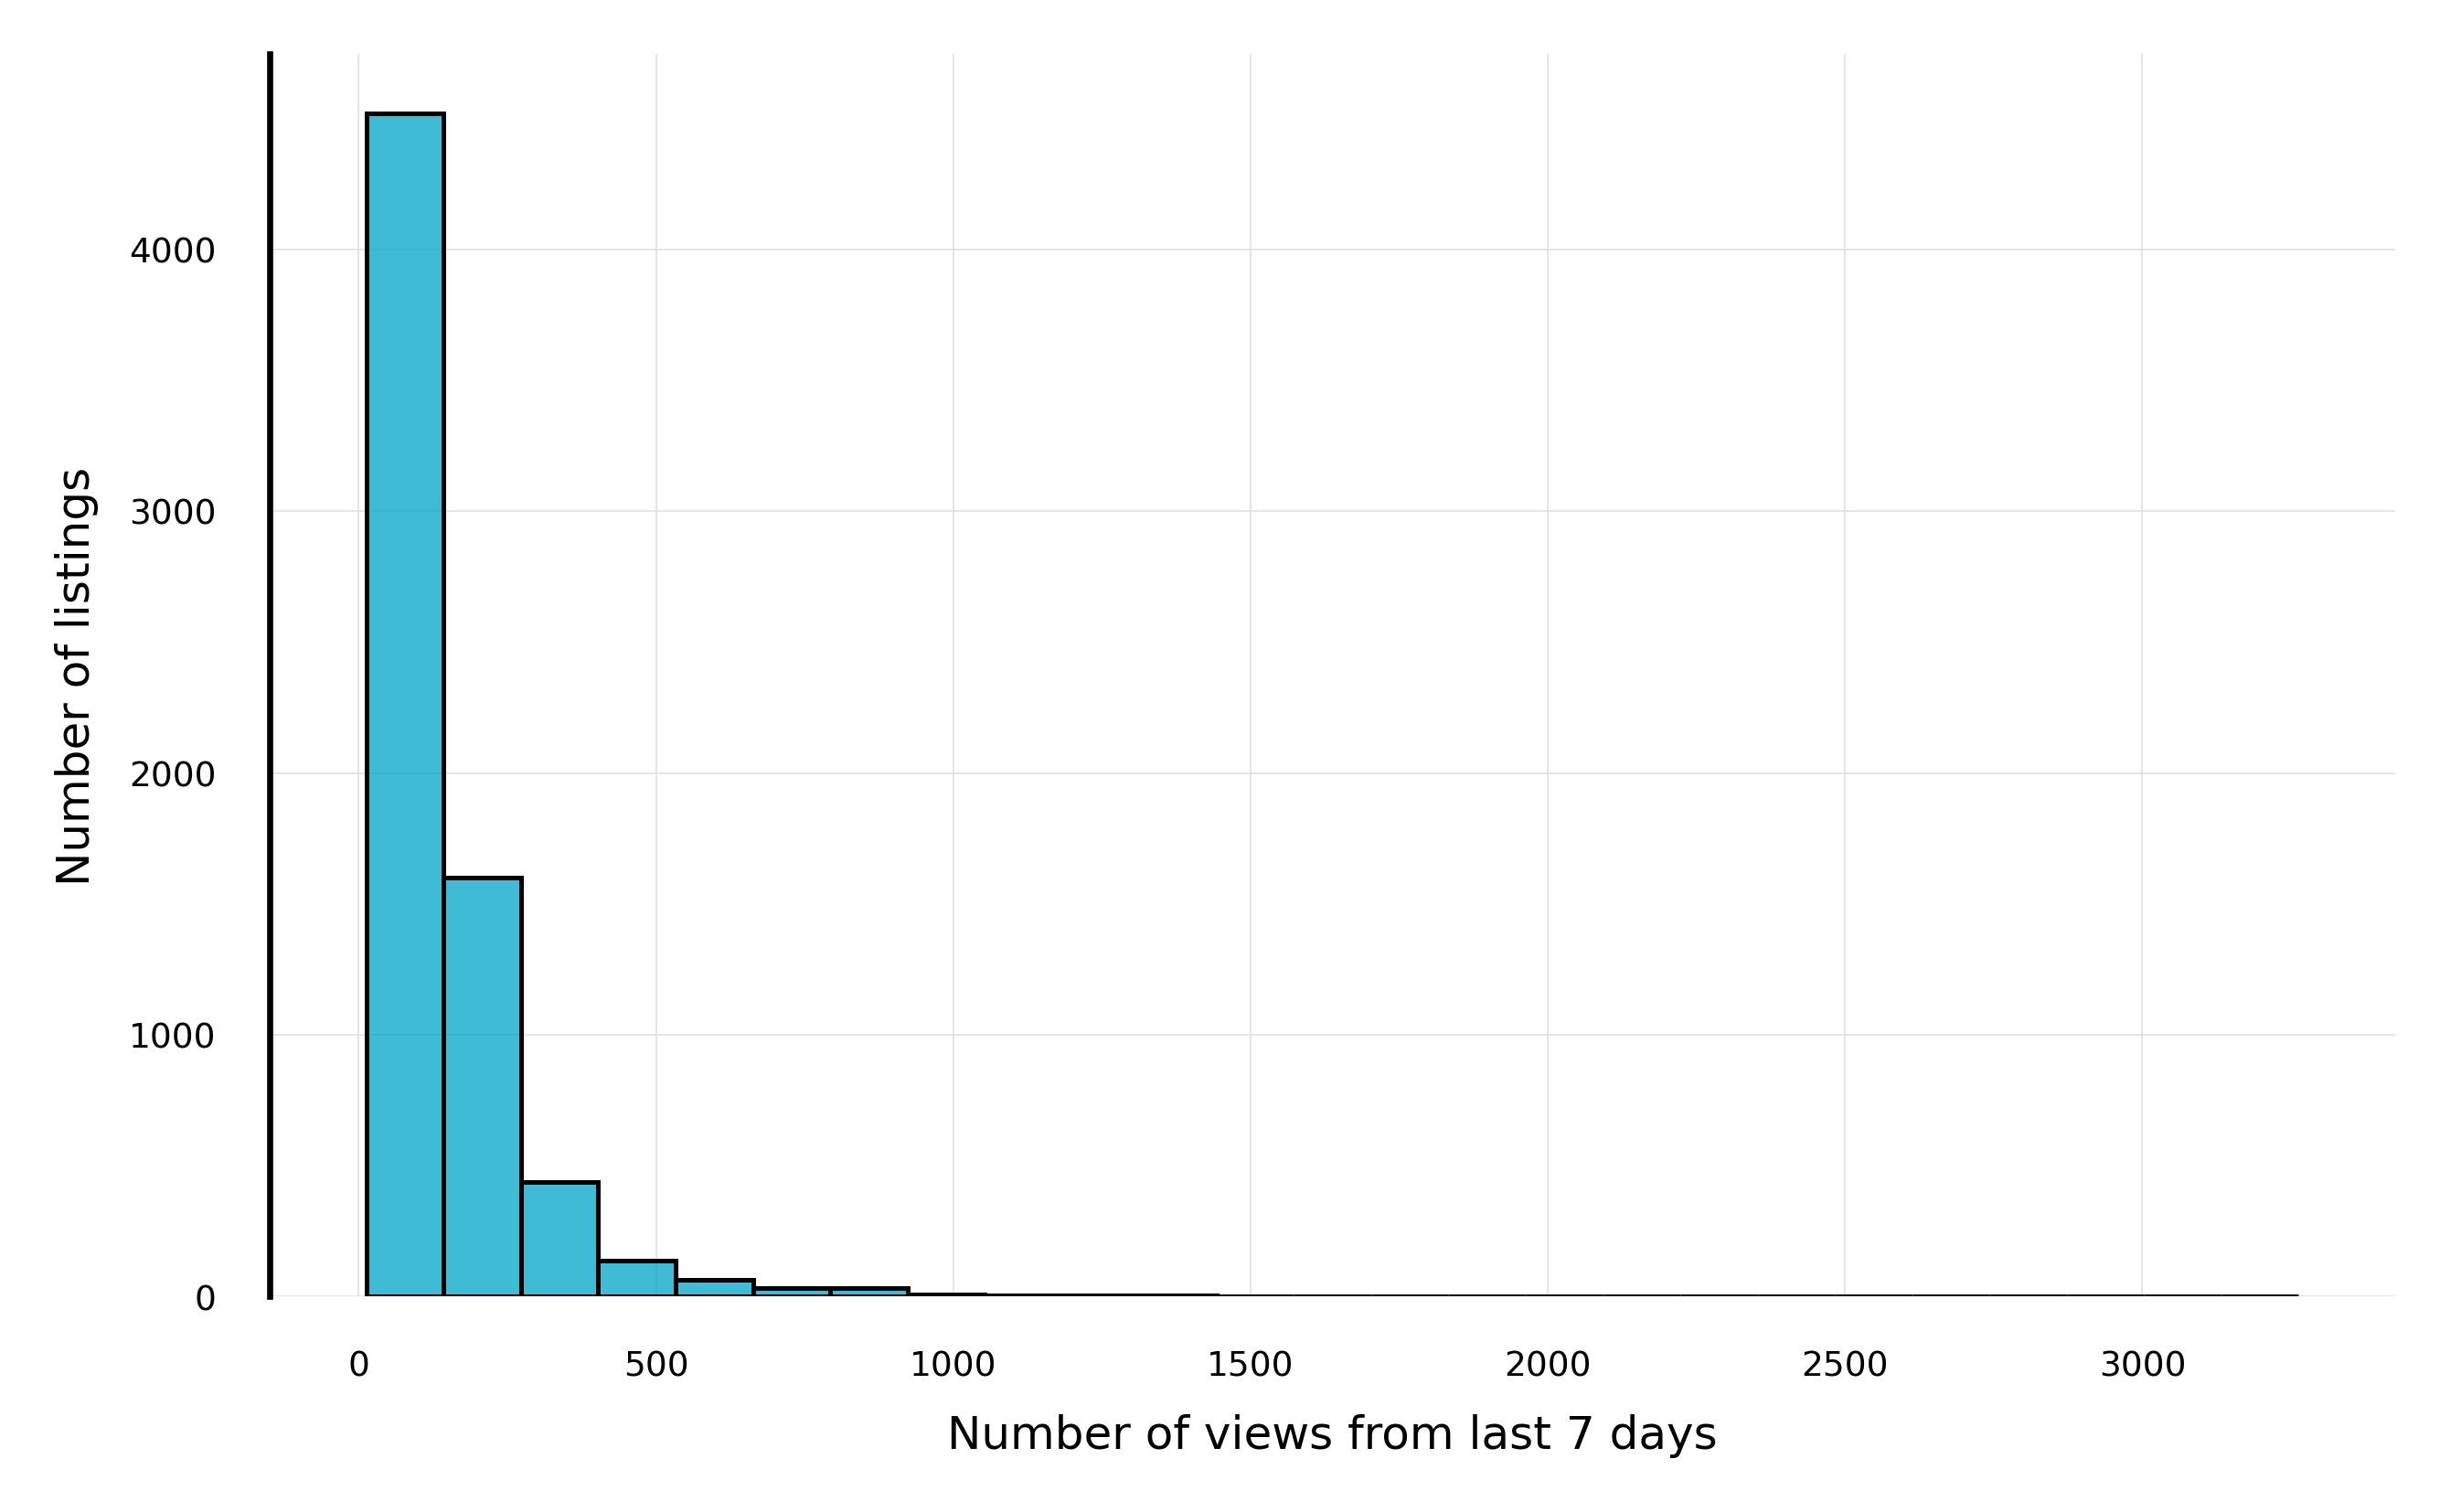

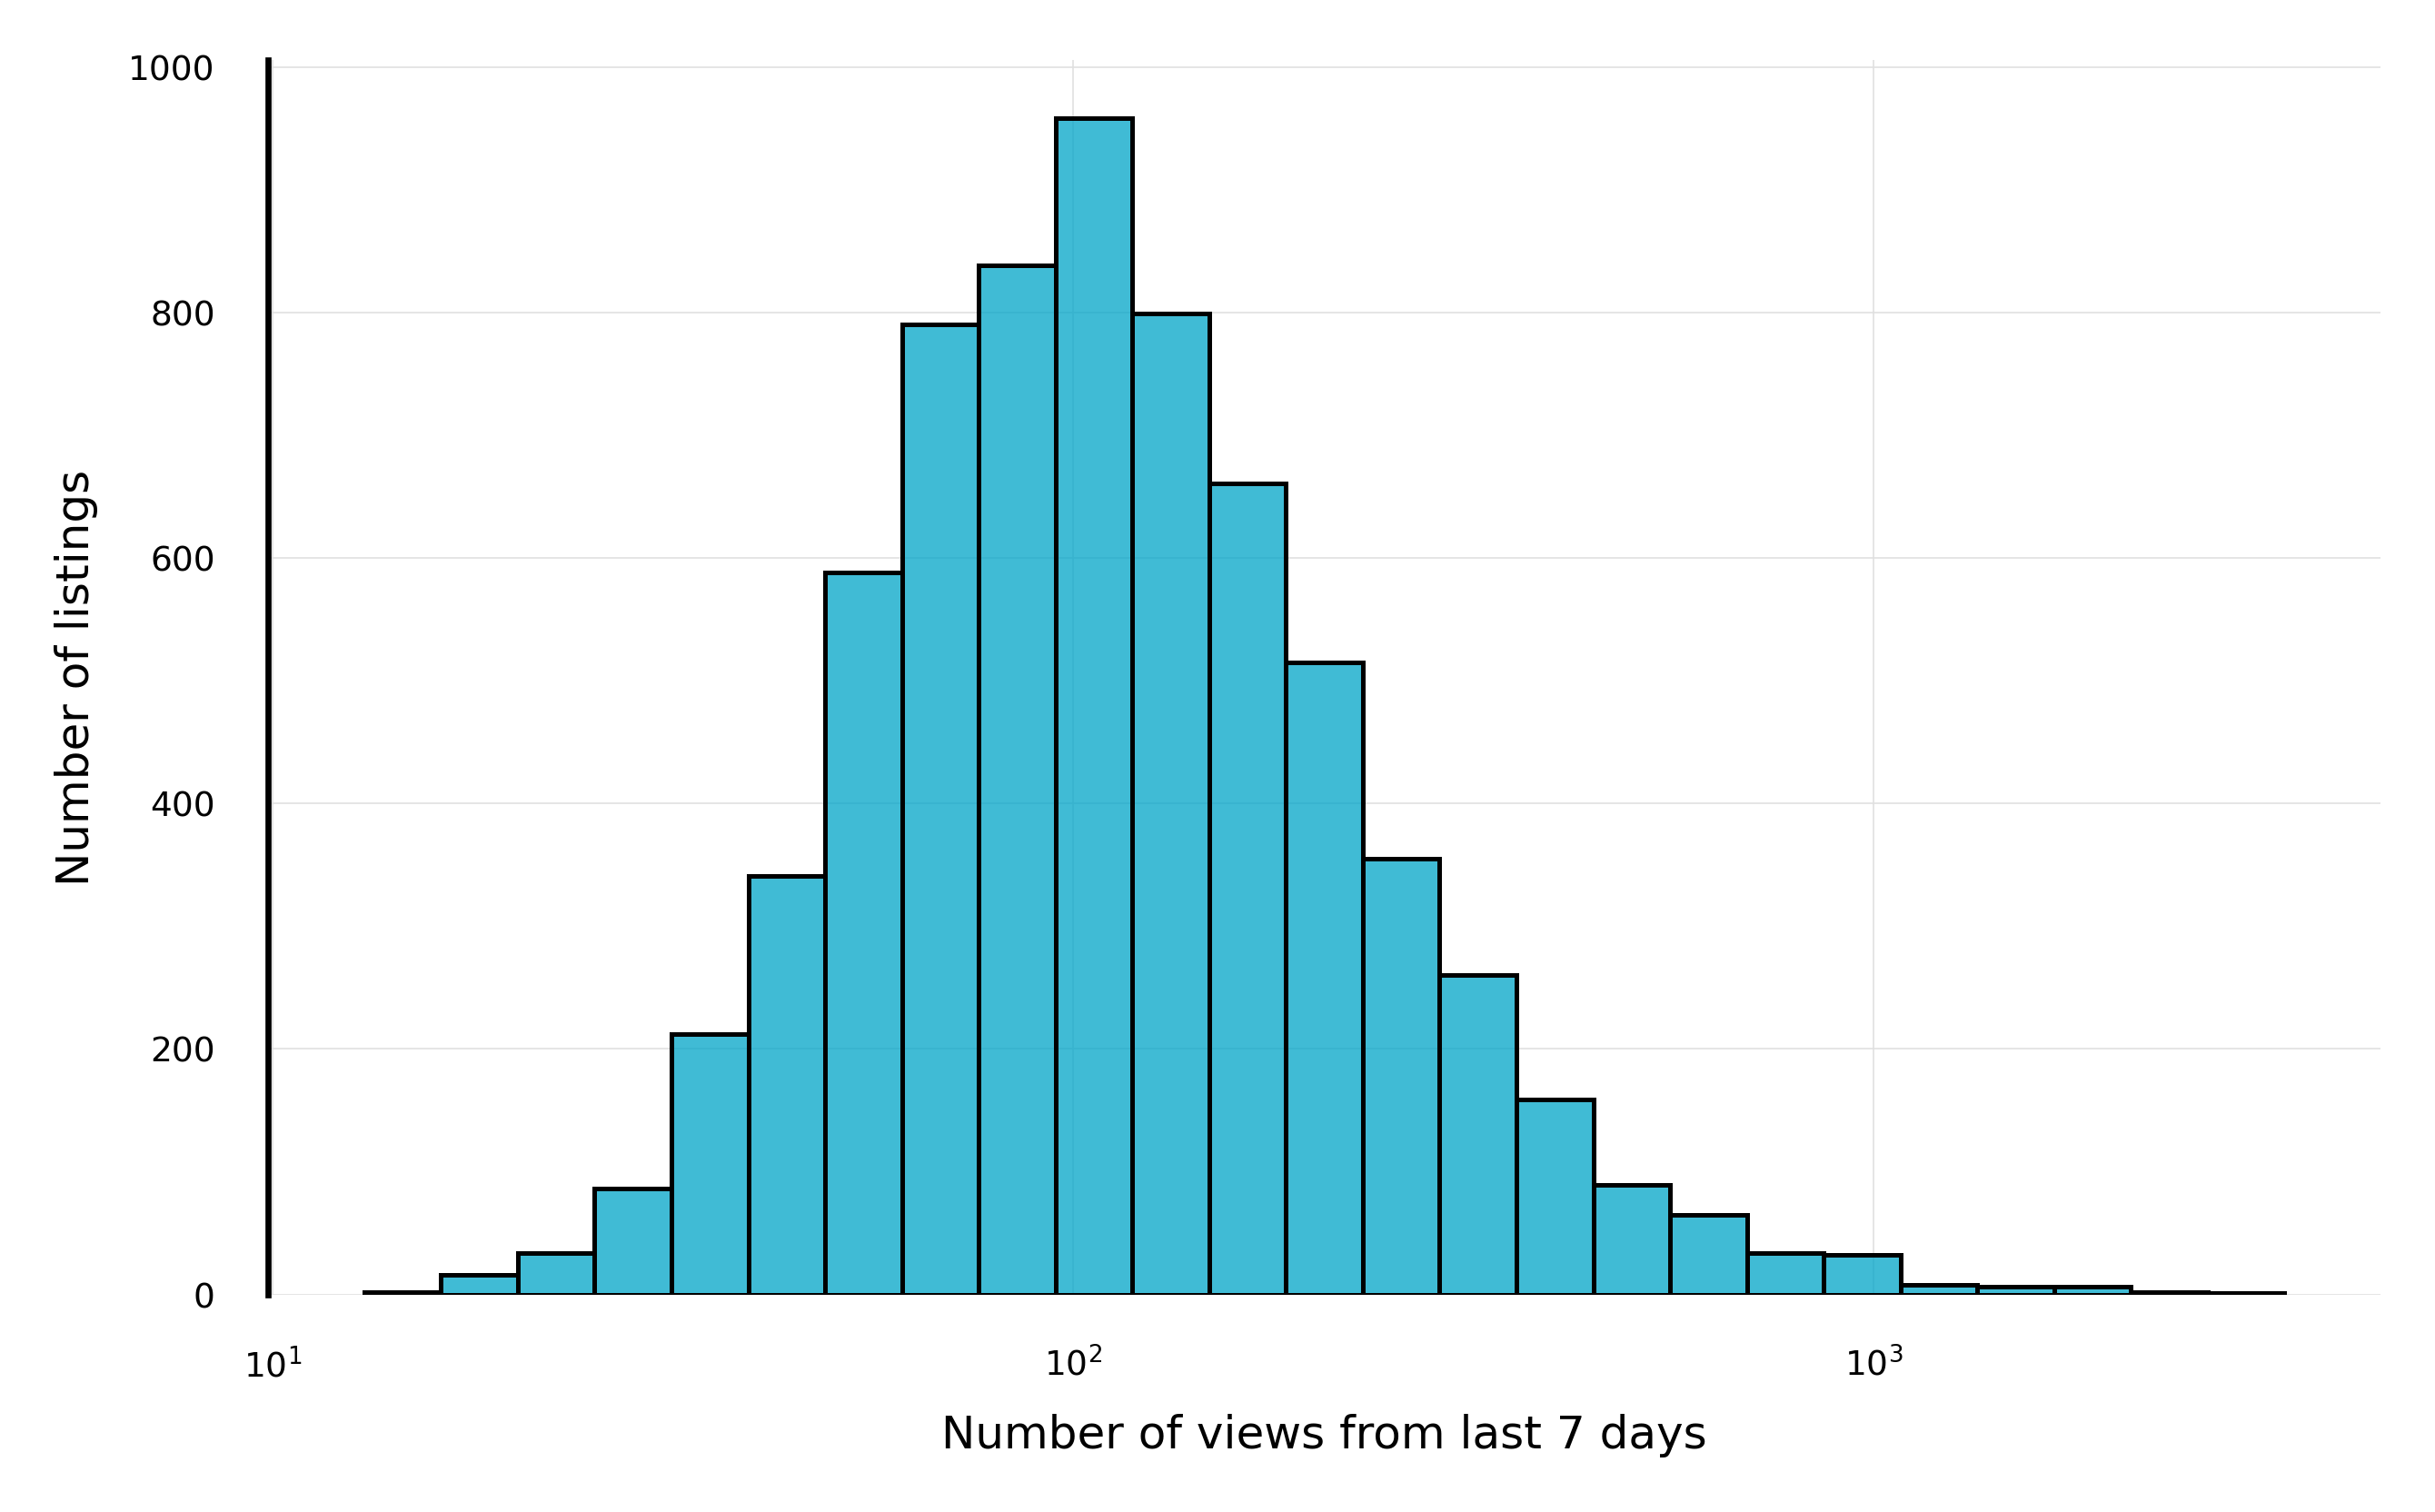

In [71]:

def plot_hist(df, col, text, log=True):
    plt.rcParams['figure.dpi'] = 600
    fig = plt.figure(figsize=(5, 3), facecolor='white')
    gs = fig.add_gridspec(1, 1)
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.set_facecolor("white")
    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0_sns = sns.histplot(
        ax=ax0, x=df[col], zorder=3, linewidth=0.6, bins=25, log_scale=log, color="#00a4c8")
    ax0_sns.set_xlabel(f"Number of views from {text}", fontsize=6)
    ax0_sns.set_ylabel("Number of listings", fontsize=6)
    ax0.grid(which='major', axis='x', zorder=0, color='#e0e0e0', lw=0.2)
    ax0.grid(which='major', axis='y', zorder=0, color='#e0e0e0', lw=0.2)
    ax0_sns.tick_params(labelsize=4.5)
    plt.show()


plot_hist(df_eda, 'views_7d', 'last 7 days', log=False)
plot_hist(df_eda, 'views_7d', 'last 7 days', log=True)


There are extreme values to the right.

Right-sided assymetry. Fews listings have much bigger number of views than the rest of the listings.

Quem são eles?

Note that RMSE will skip these extreme values. Portanto, iremos transformar a nossa target usando o logarítimo em nosso modelo.


### Target and others


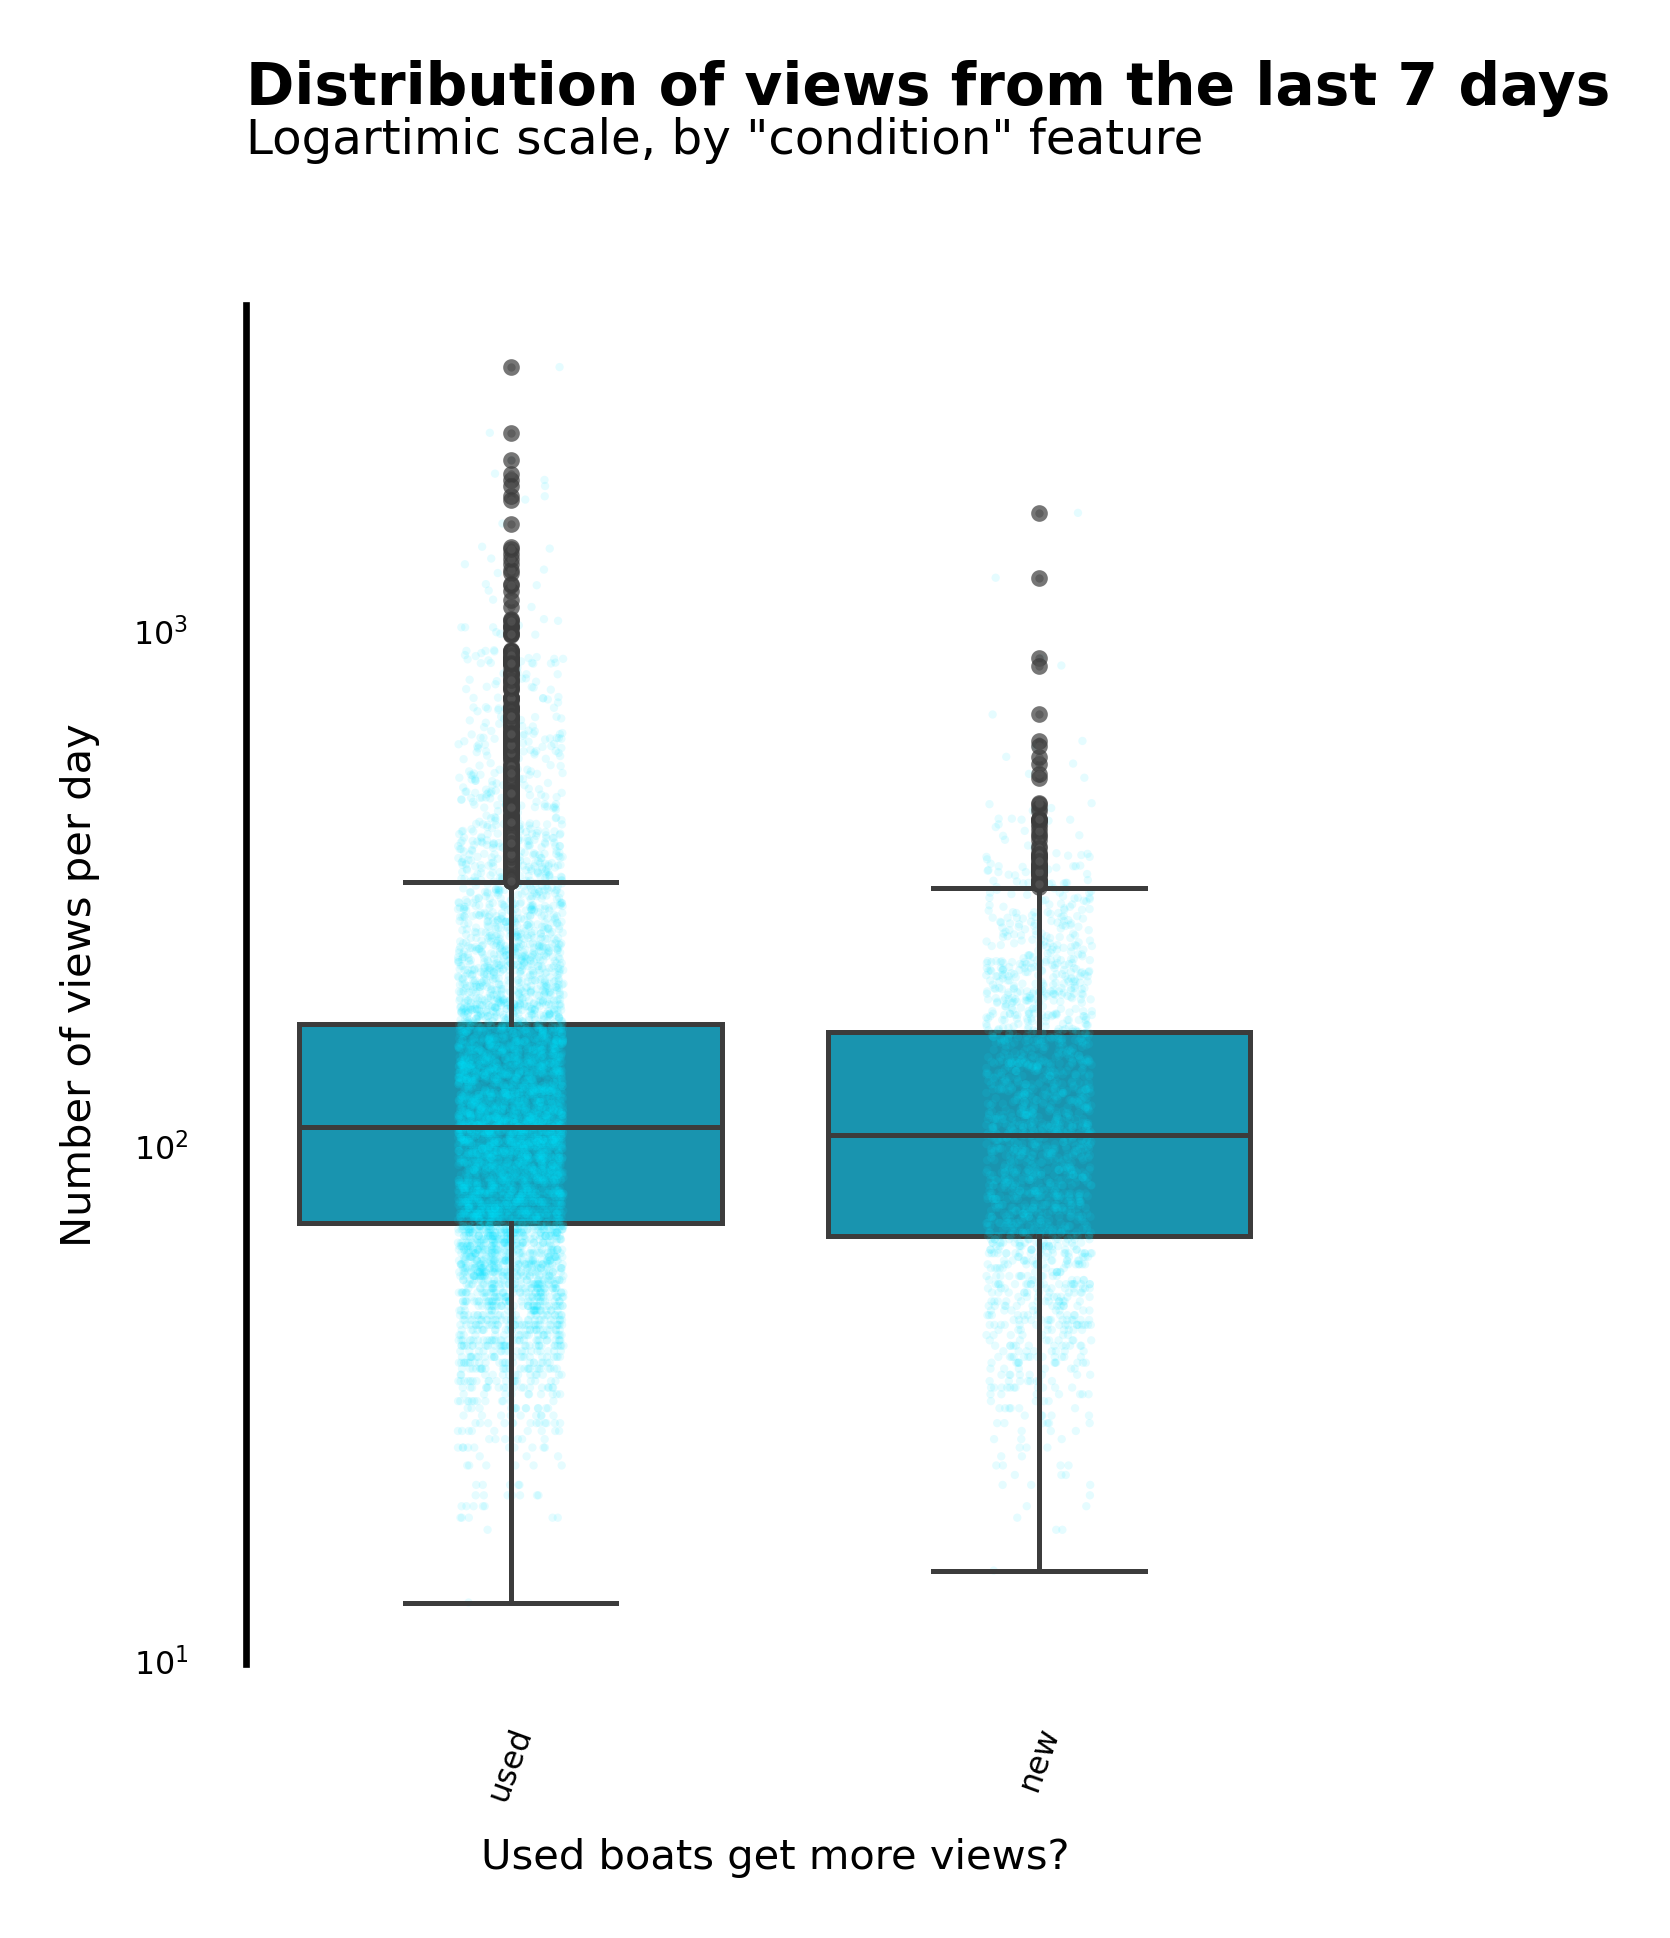

In [83]:
def plot_box_with_7d(df, col, question):
    plt.rcParams['figure.dpi'] = 600
    fig = plt.figure(figsize=(5, 3), facecolor='white')
    gs = fig.add_gridspec(1, 2)
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.set_facecolor("white")

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)

    ax0.text(-0.5, 10**4, 'Distribution of views from the last 7 days',
             color='black', fontsize=7, ha='left', va='bottom', weight='bold')
    ax0.text(-0.5, 10**4, f'Logartimic scale, by "{col}" feature',
             color='black', fontsize=5.8, ha='left', va='top')
    ax1 = sns.stripplot(x=col, y="views_7d", data=df,
                        size=1, color="#00e5ff", linewidth=0, alpha=.1)
    ax0_sns = sns.boxplot(ax=ax0, x=df[col].astype(str), y=df['views_7d'], zorder=3, linewidth=0.6, color="#00a4c8",
                          flierprops=dict(markerfacecolor='0.55', alpha=0.7, markersize=1, marker='o'))
    ax0_sns.set_yscale('log')
    ax0_sns.set_ylabel("Number of views per day", fontsize=5)
    ax0_sns.set_xlabel(f"{question}", fontsize=5)
    ax0_sns.tick_params(labelsize=3.8)
    plt.xticks(rotation=70)
    # Add in points to show each observation
    plt.show()


df_eda = df_eda.replace(to_replace=['None'], value=np.nan)

plot_box_with_7d(df_eda, 'condition', 'Used boats get more views?')


Não há muito diferença entre a média de de visualizações de barcos novos ou usados.


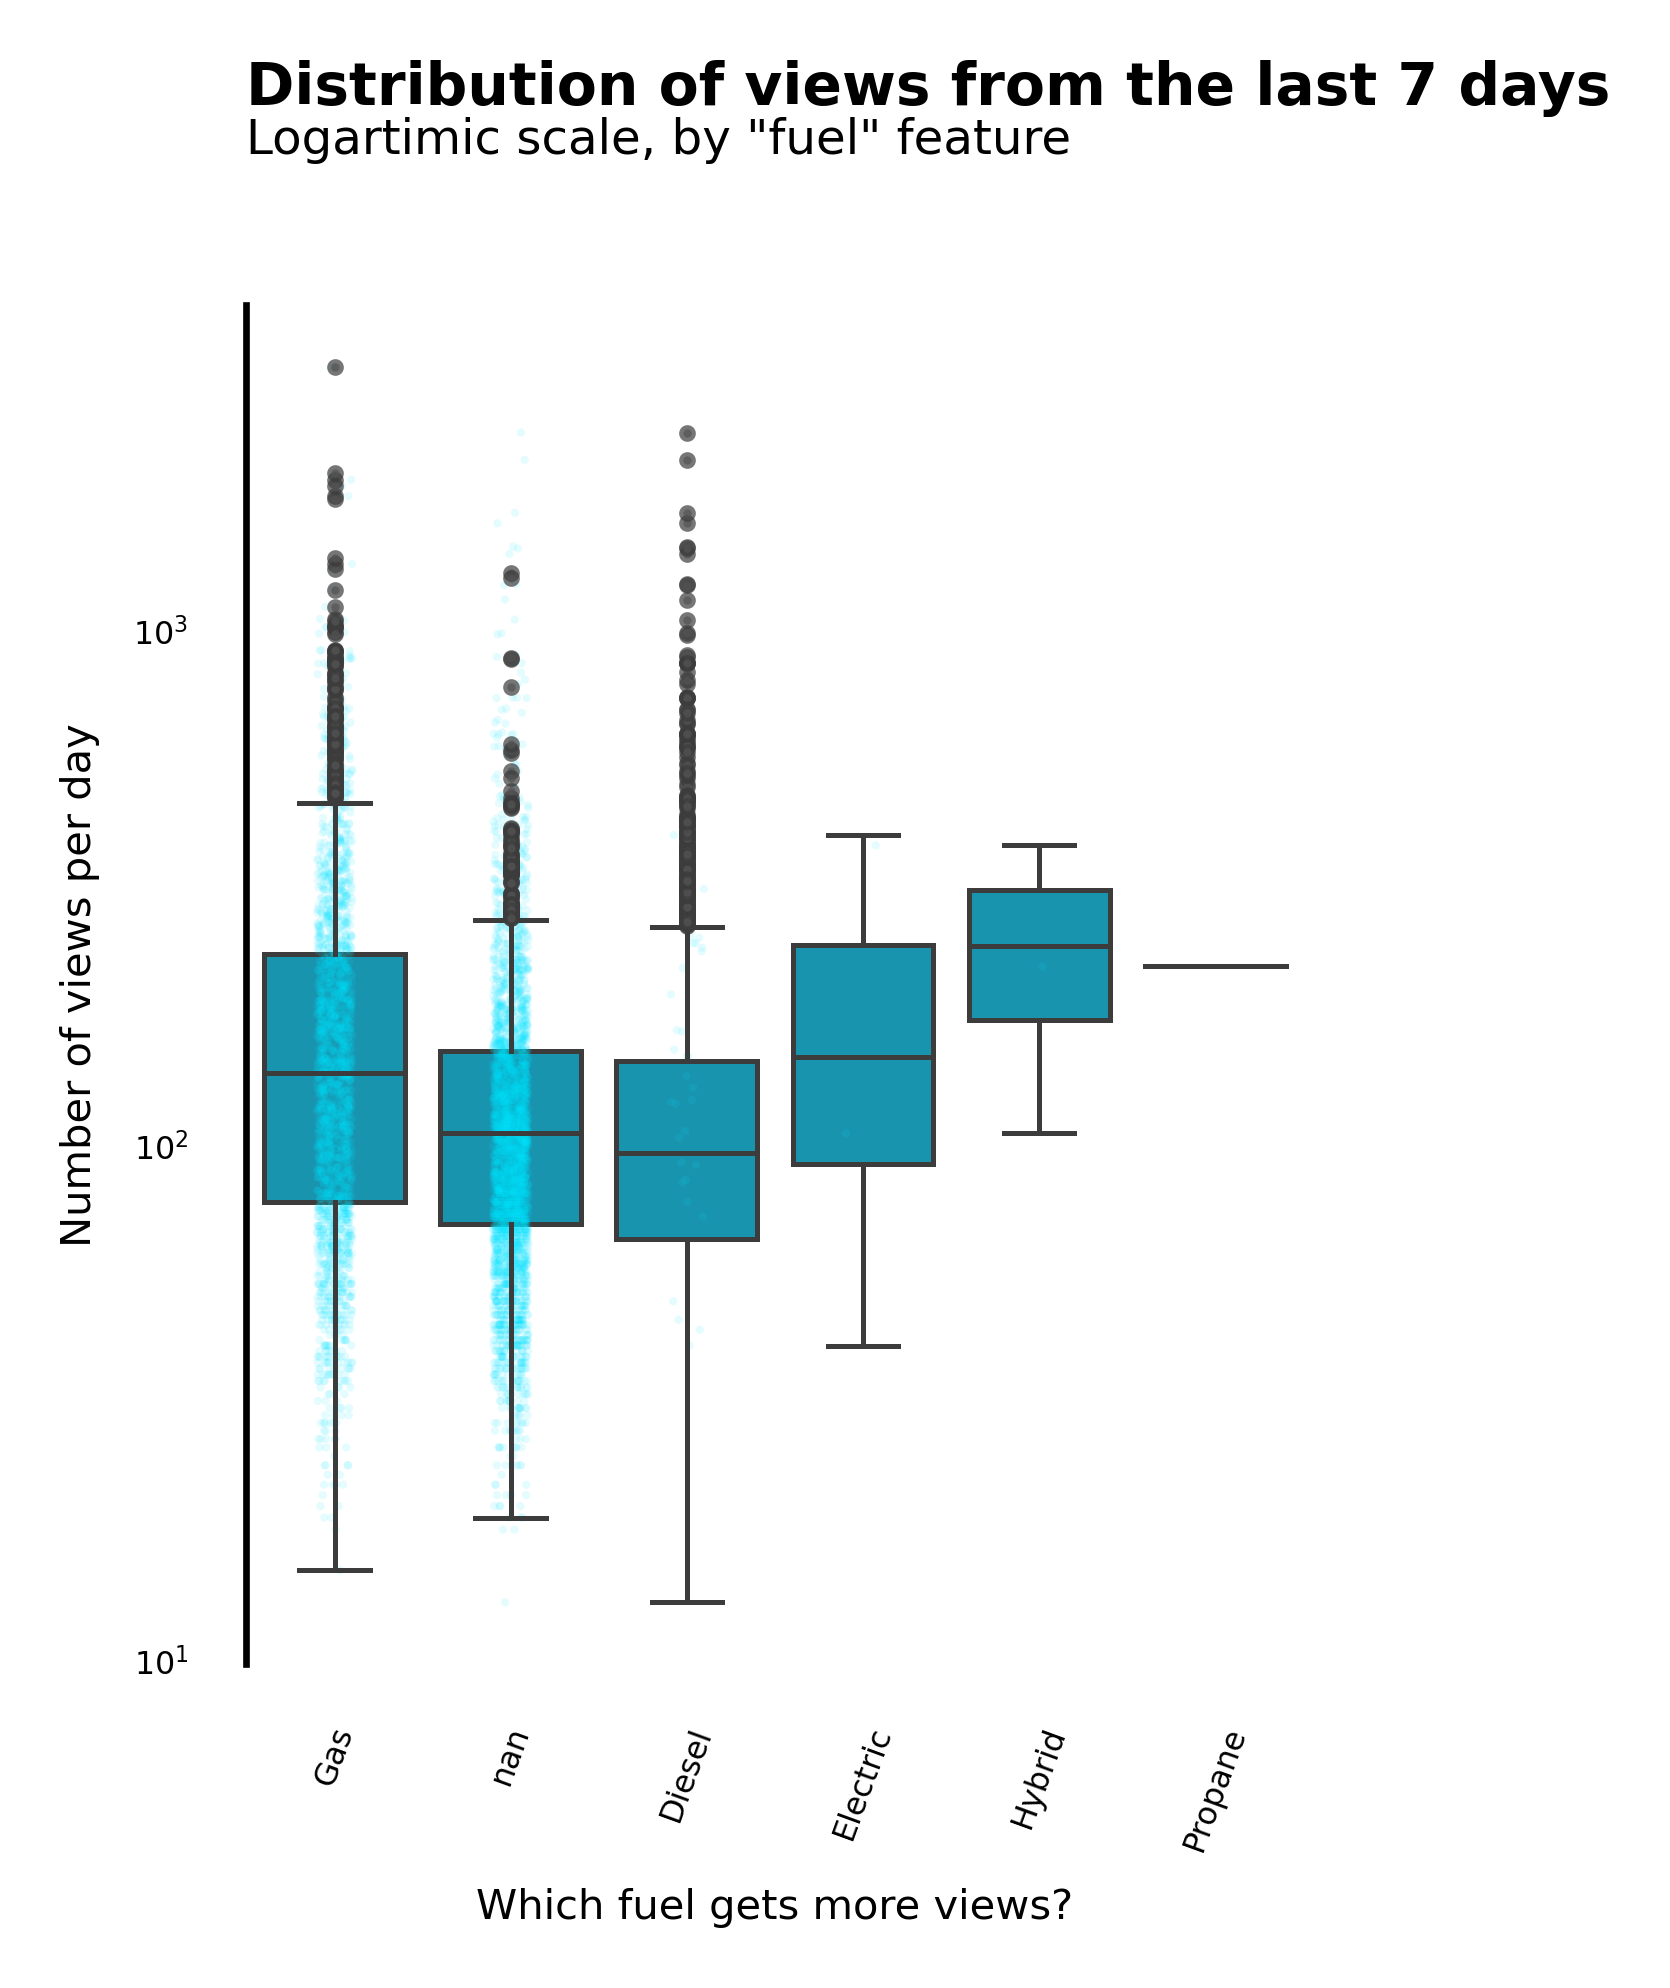

In [84]:
plot_box_with_7d(df_eda, 'fuel', 'Which fuel gets more views?')


Anuncios de barcos hibridos ou que utilizem propano possuem um elevado numero de visita, porem o numero de anuncios se concentra nos que utilizam gasolina ou diesel.

A maior parte dos anuncios se concentram em barcos que usam gasolina ou diesel.


In [80]:
df_eda['price_group'] = pd.cut(
    df_eda['price_eur'],
    bins=[0, 10000, 25000, 50000, 100000, 200000, 500000, np.Inf],
    labels=['0-10000', '10000-25000', '25000-50000', '50000-100000',
            '100000-200000', '200000-500000', '500000+'],
    include_lowest=True
)


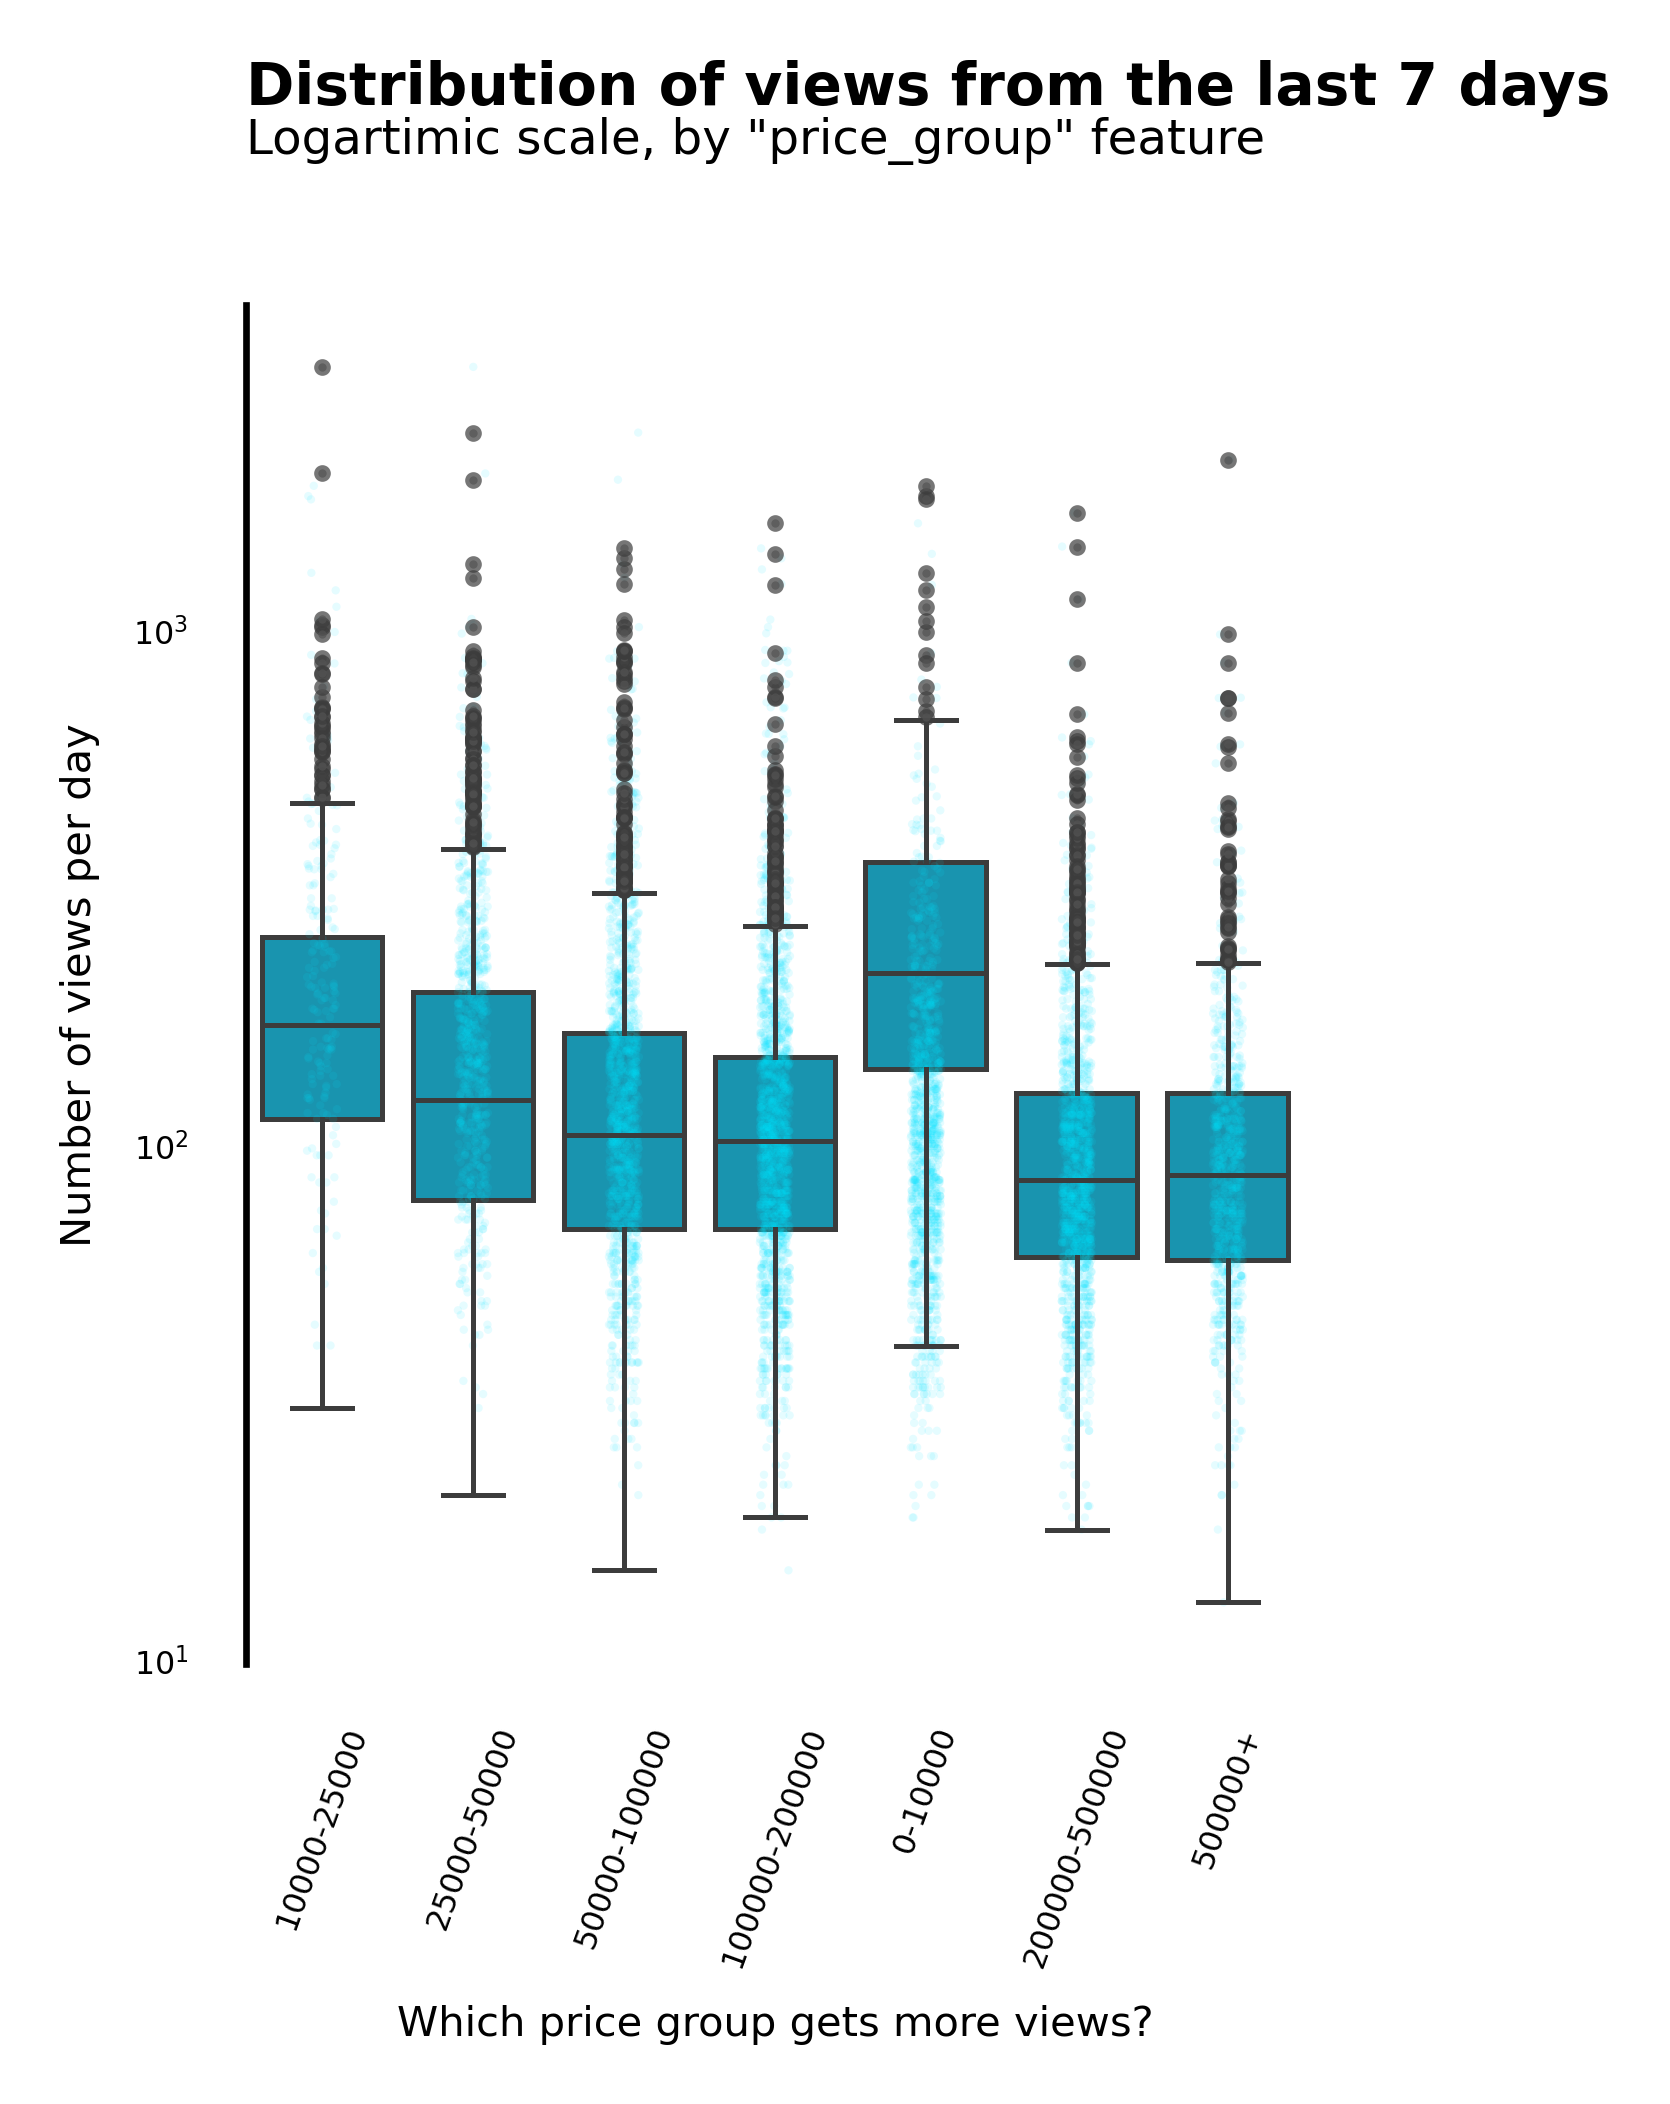

In [85]:
plot_box_with_7d(df_eda, 'price_group', 'Which price group gets more views?')


O primeiro grupo apresenta grande diferença - barcos mais baratos possuem muito mais views do que os caros.


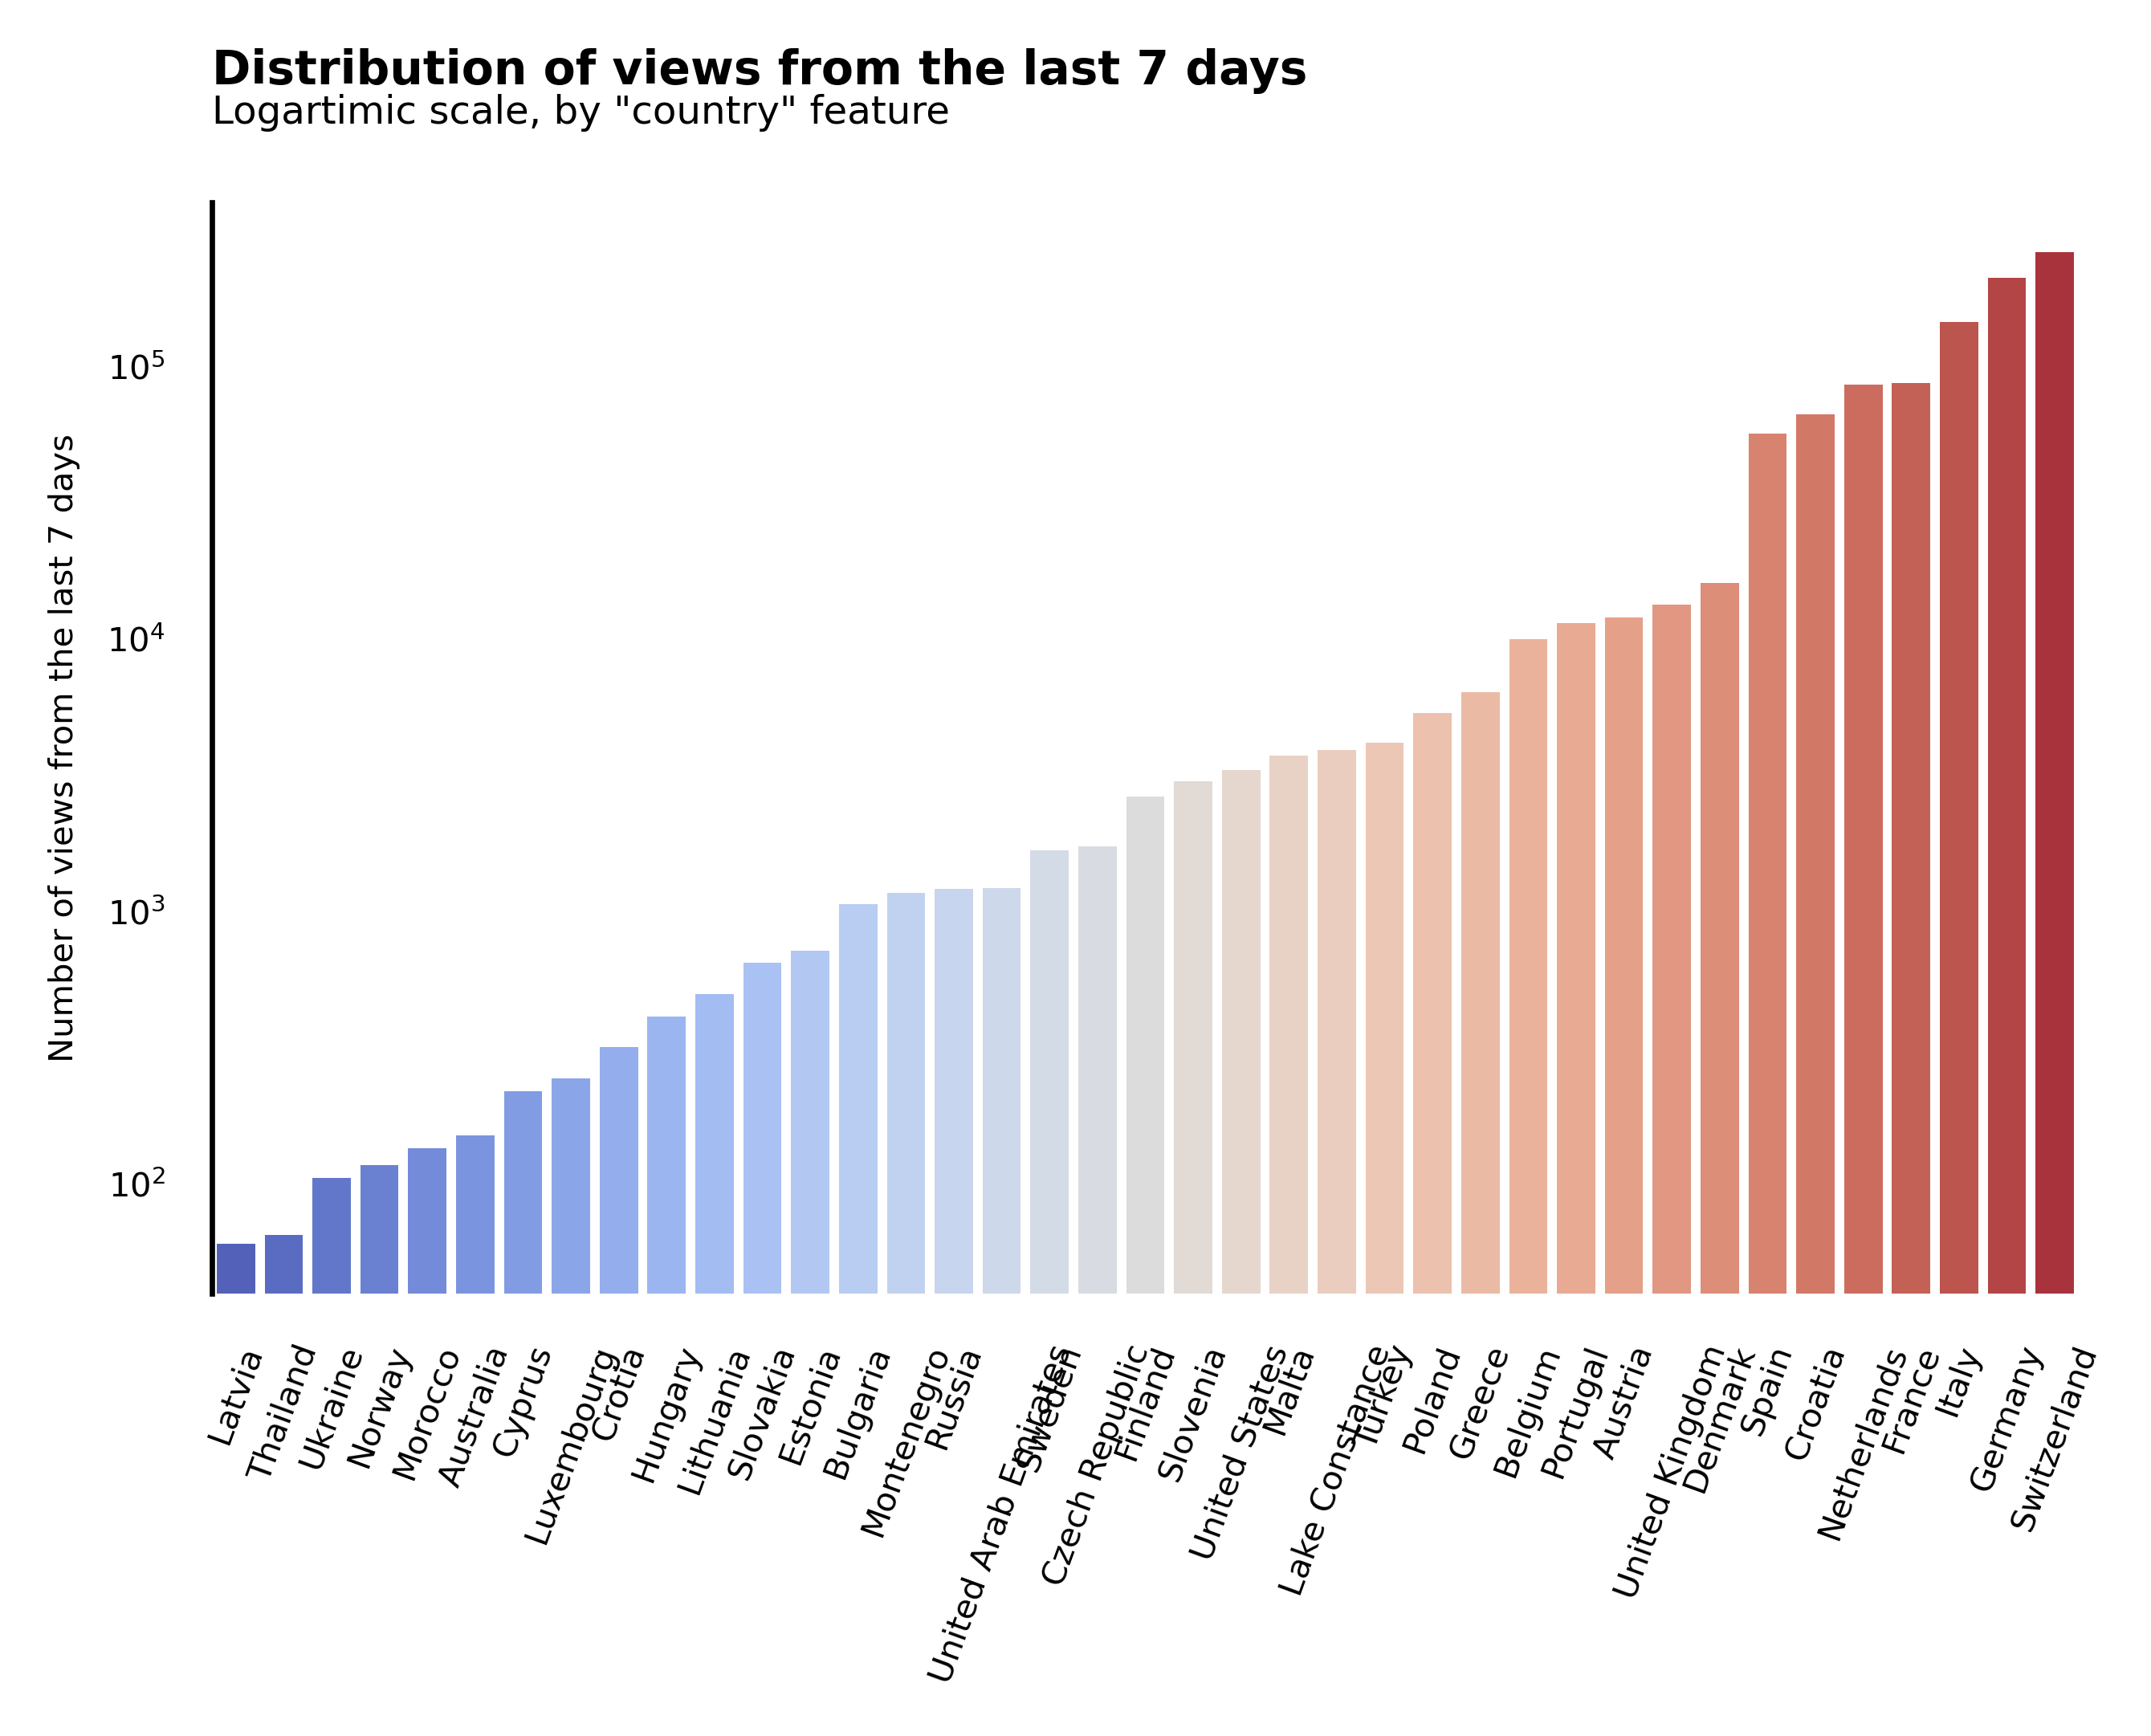

In [113]:
def plot_avg_views(df, x, y, log=True, method='sum'):
    plt.rcParams['figure.dpi'] = 600

    fig = plt.figure(figsize=(5, 3), facecolor='white')

    if method == 'sum':
        _df = df.groupby(x)[y].sum().sort_values().reset_index(drop=False)
    else:
        _df = df.groupby(x)[y].mean().sort_values().reset_index(drop=False)

    ax = sns.barplot(x=x, y=y, data=_df,
                     palette="coolwarm")
    ax.tick_params(labelsize=5)

    ax.text(-0.5, 10**6, 'Distribution of views from the last 7 days',
            color='black', fontsize=7, ha='left', va='bottom', weight='bold')
    ax.text(-0.5, 10**6, f'Logartimic scale, by "{x}" feature',
            color='black', fontsize=5.8, ha='left', va='top')
    #plt.title(f"Average views last 7 days per {x}", fontsize = 10)
    if log == True:
        ax.set_yscale('log')
    else:
        pass
    ax.set_xlabel('')
    ax.set_ylabel("Number of views from the last 7 days", fontsize=5)
    plt.xticks(rotation=70)
    return fig.show()


plot_avg_views(df_eda, 'country', 'views_7d', log=True)


A maioria dos views se concentram na europa em países como a Suiça e Alemanha.


### Rankings


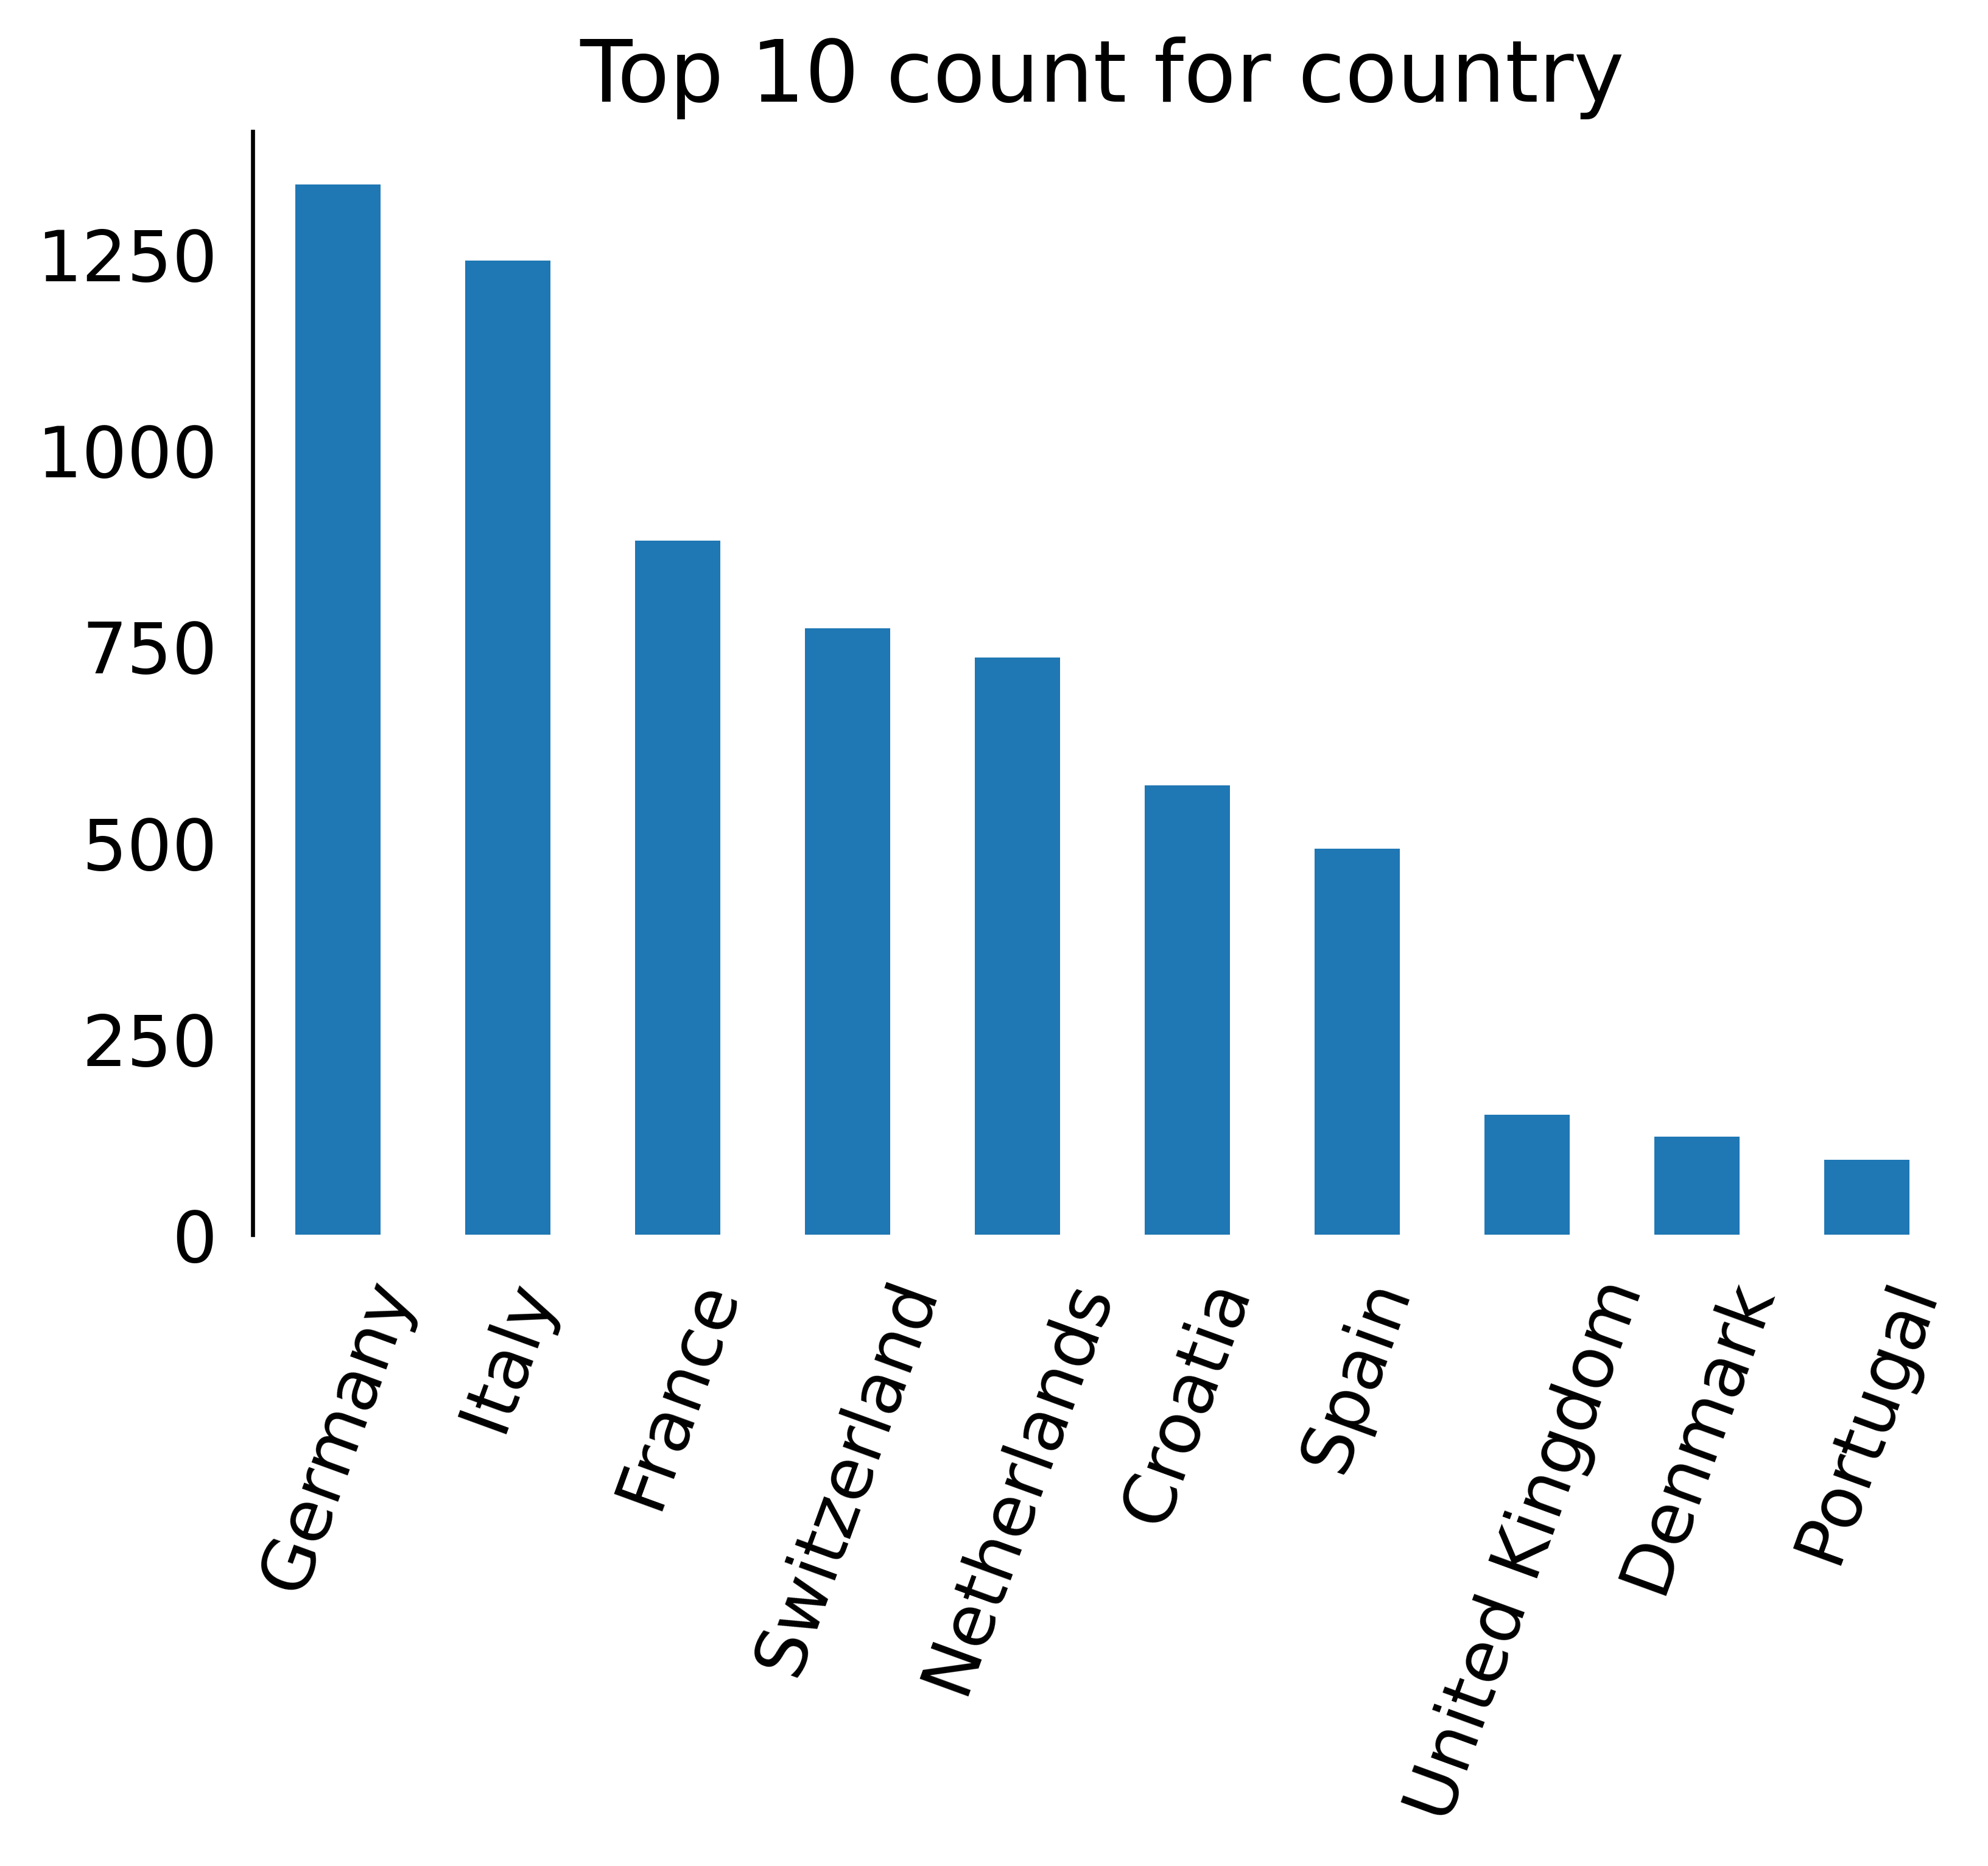

In [127]:
df_eda.country.value_counts().head(10).plot(
    kind='bar', title='Top 10 count for country')
plt.xticks(rotation=70)
plt.show()


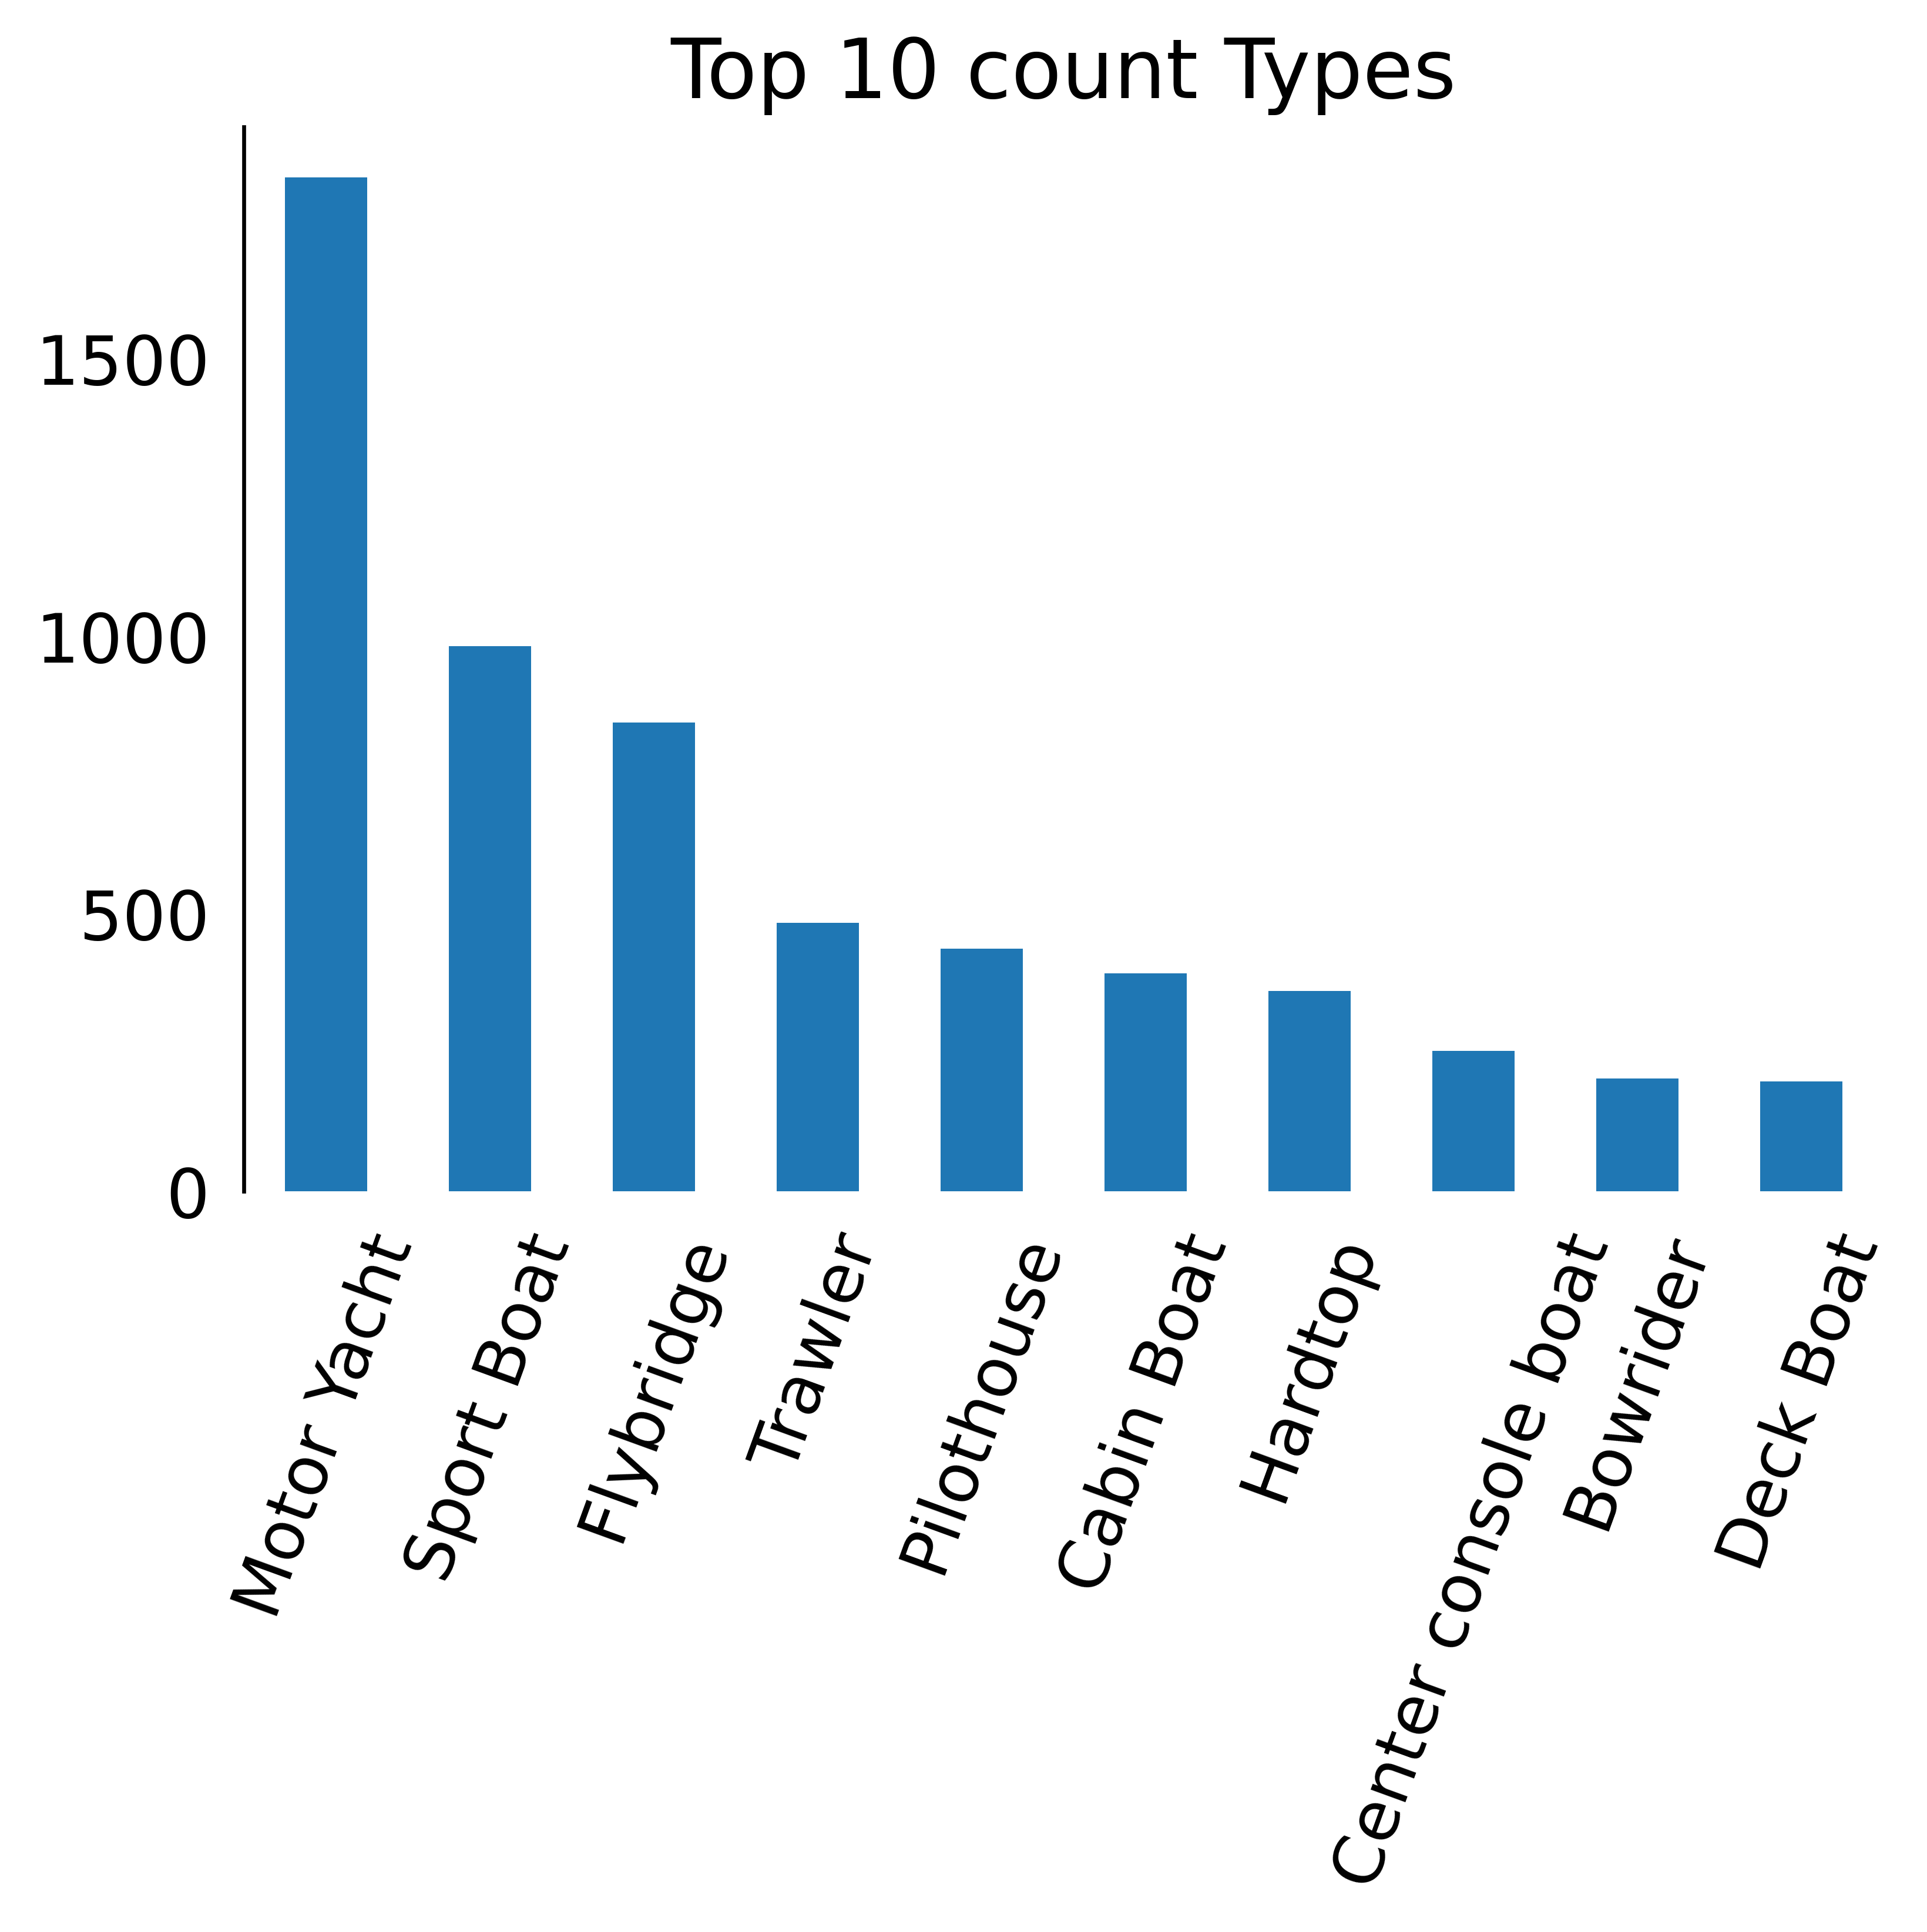

In [126]:
df_eda.boat_type.value_counts().head(10).plot(
    kind='bar', title='Top 10 count Types')
plt.xticks(rotation=70)
plt.show()


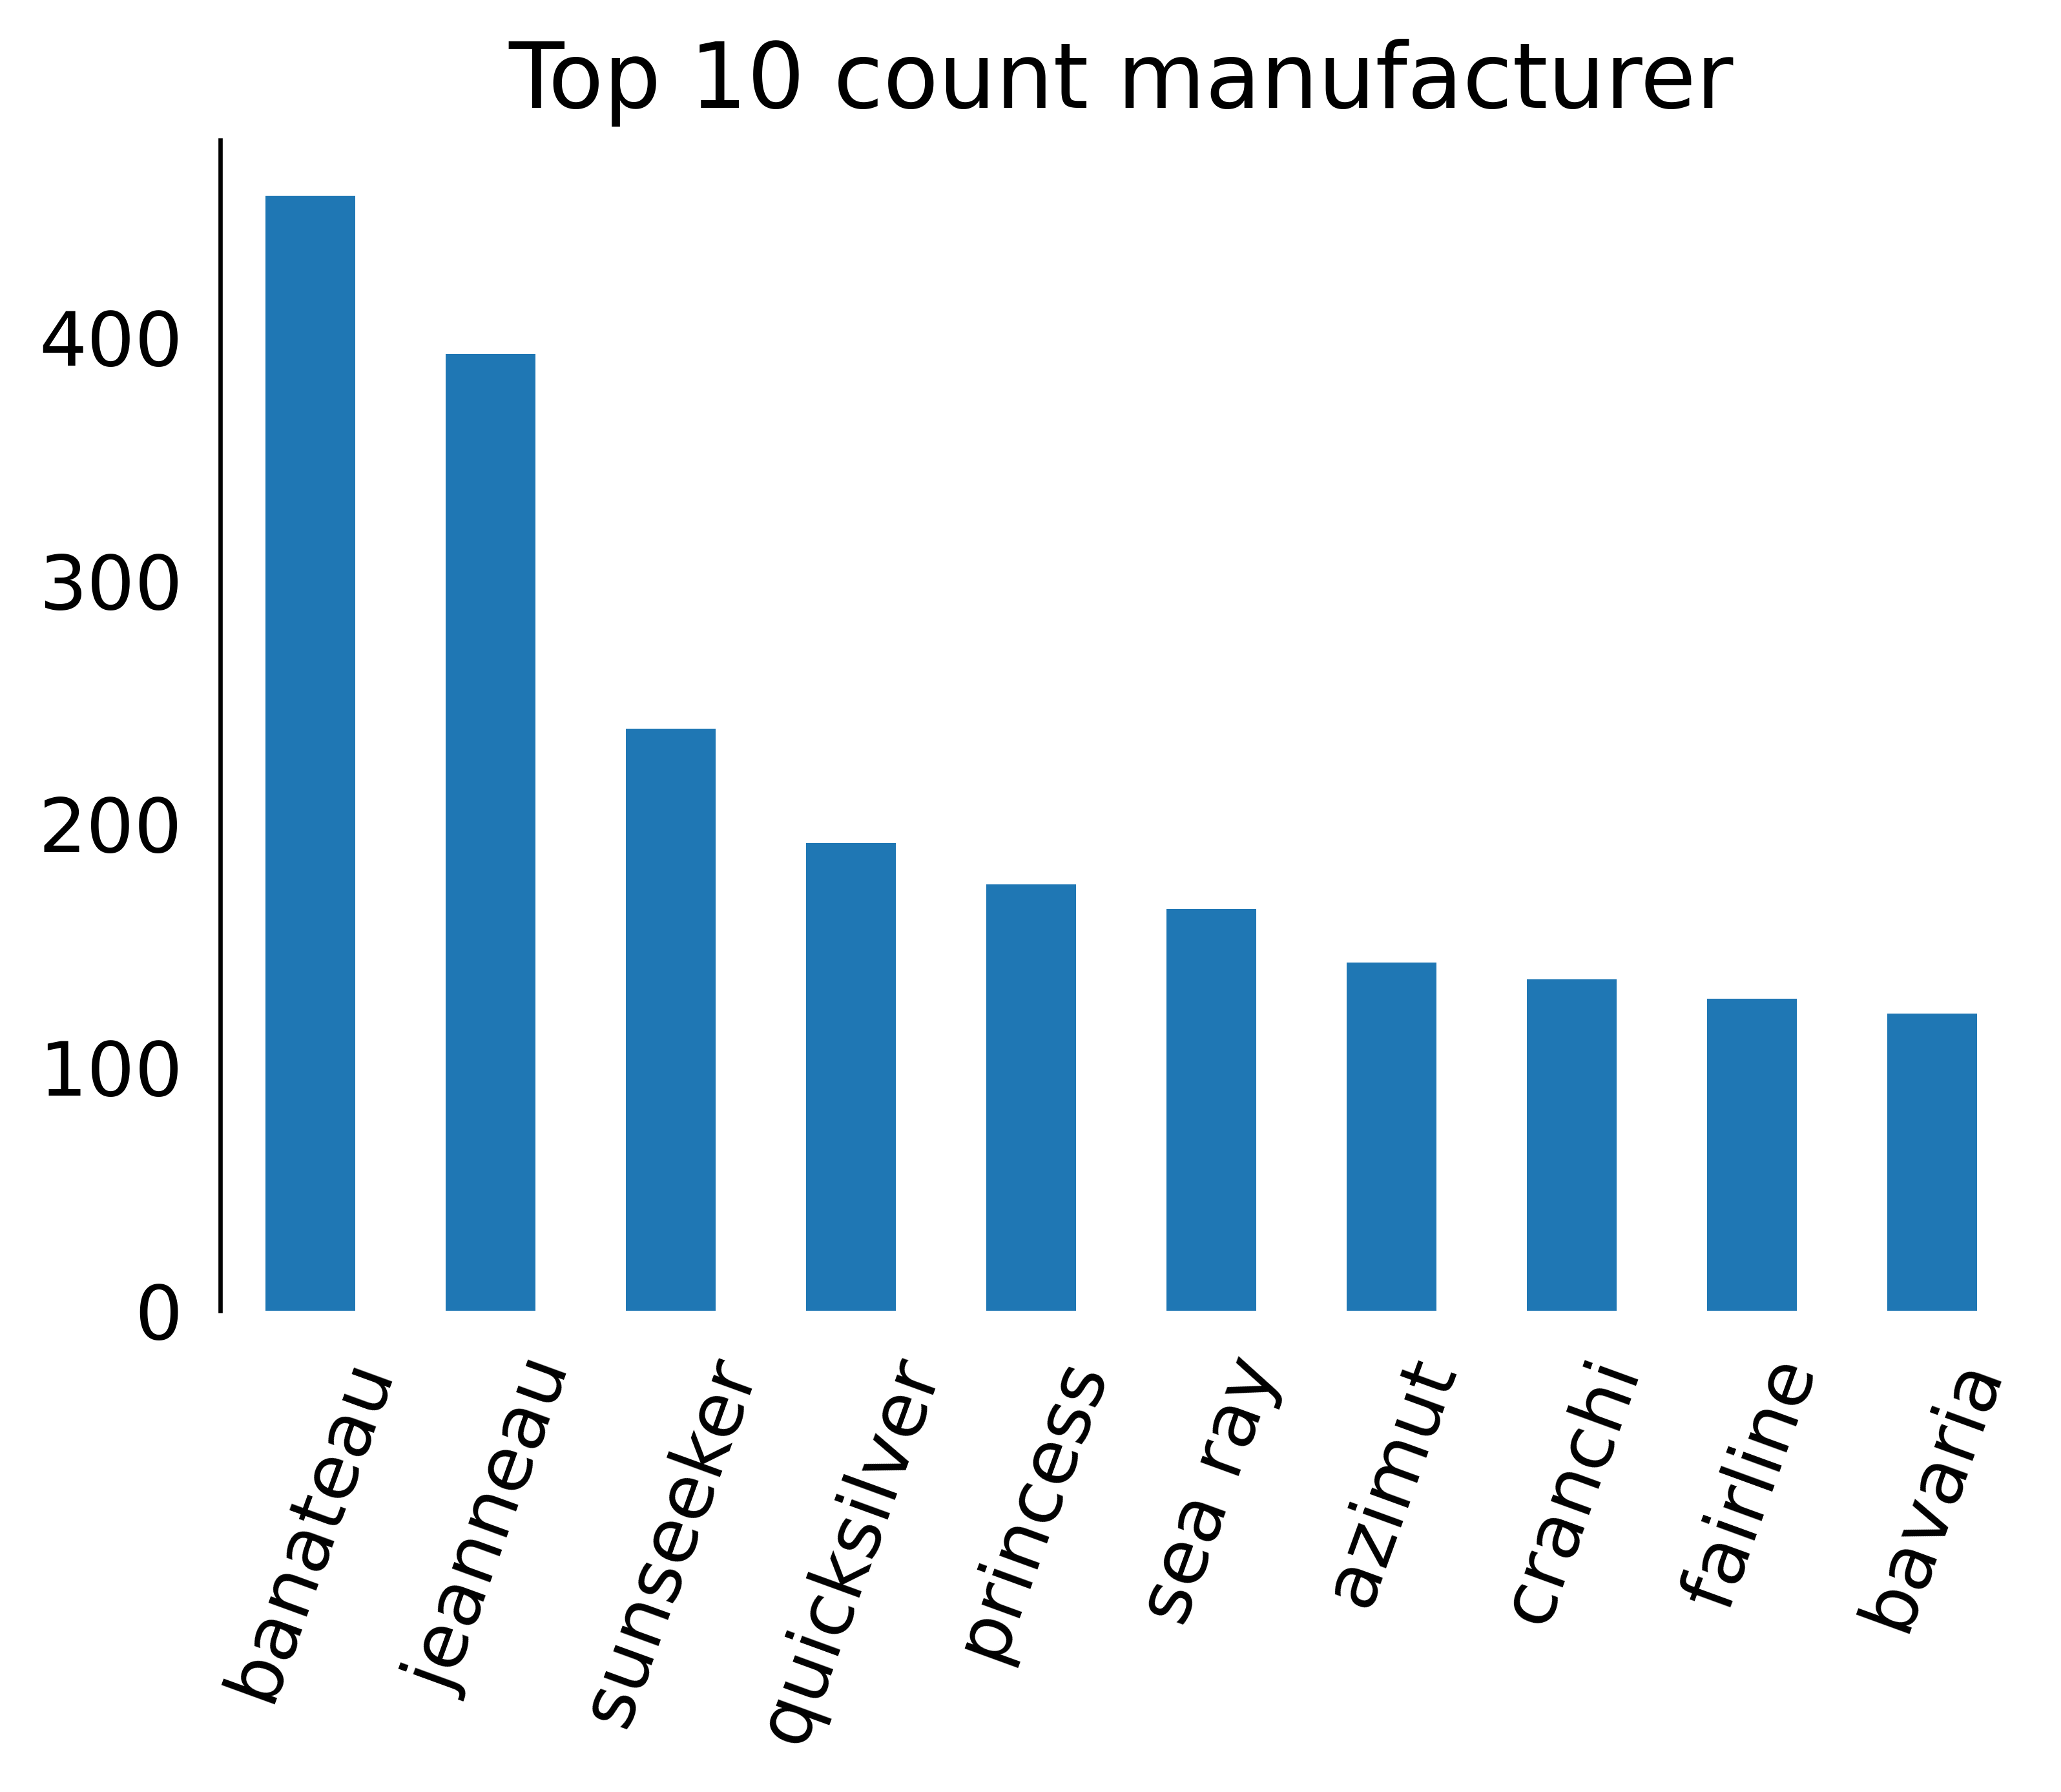

In [128]:
df_eda.manufacturer.value_counts().head(10).plot(
    kind='bar', title='Top 10 count manufacturer')
plt.xticks(rotation=70)
plt.show()


### Popularity ranking


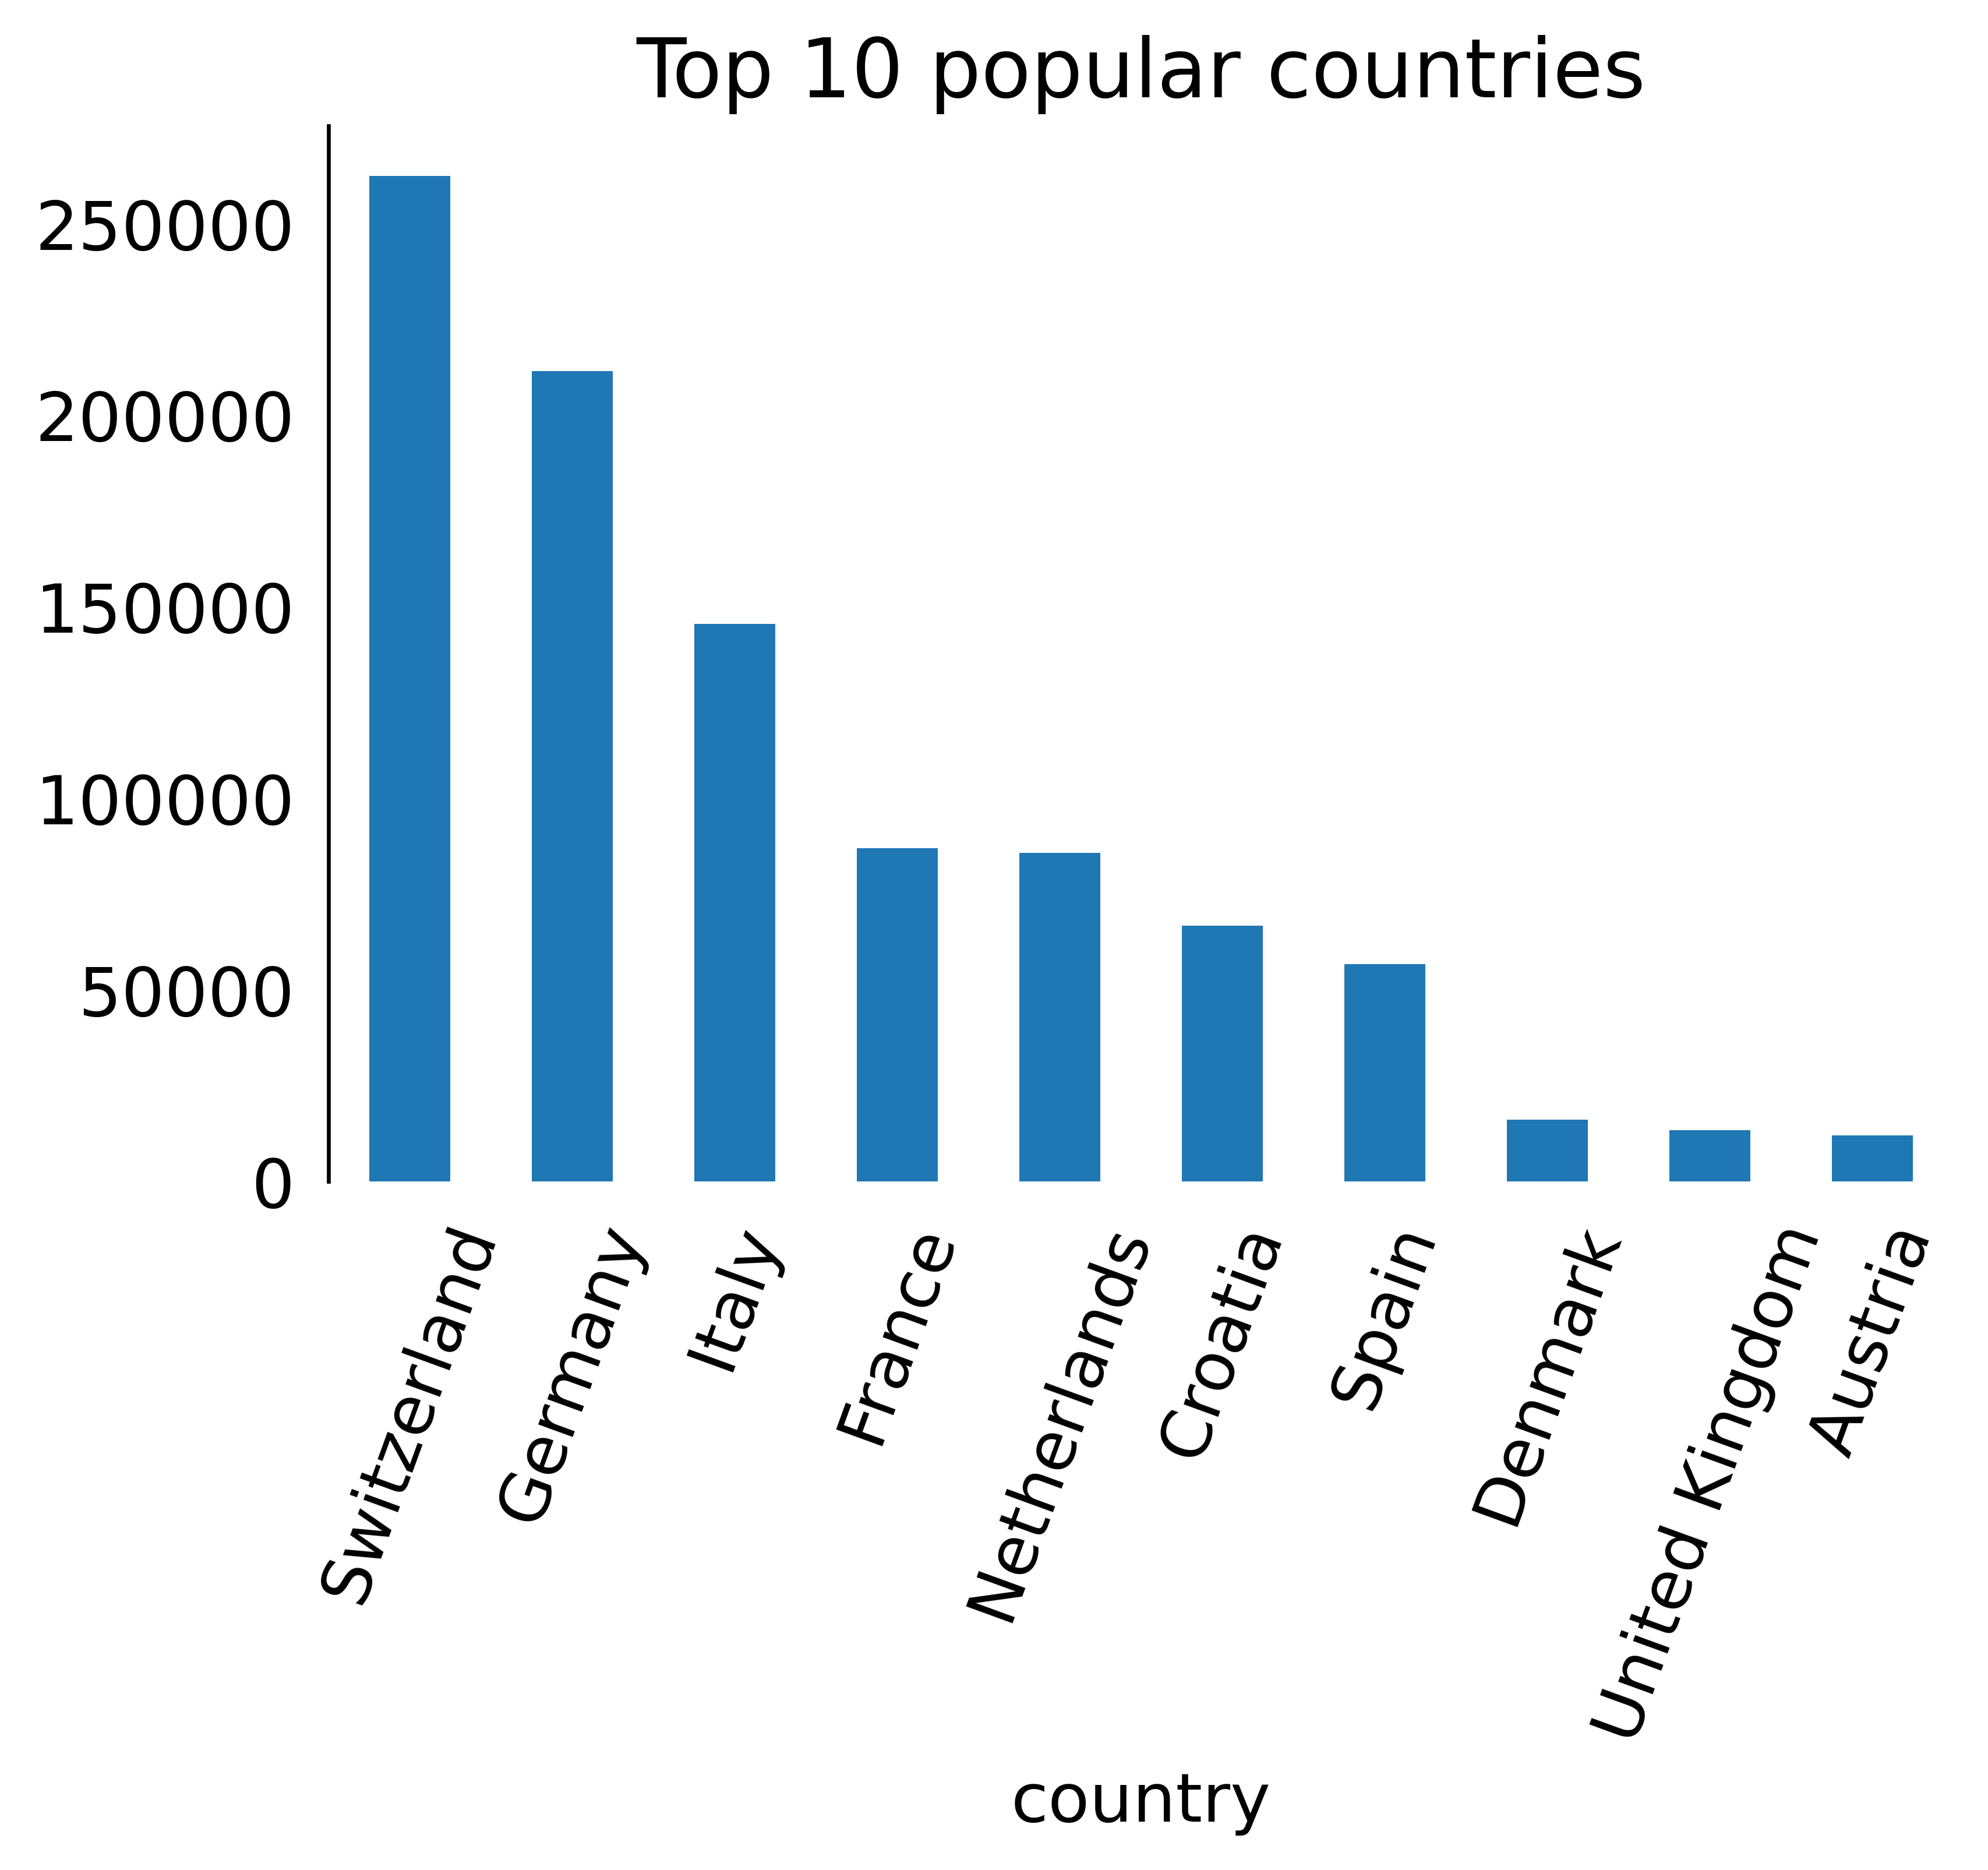

In [139]:
df_eda.groupby('country')['views_7d'].sum().sort_values(ascending=False).head(
    10).plot(kind='bar', title='Top 10 popular countries')
plt.xticks(rotation=70)
plt.show()


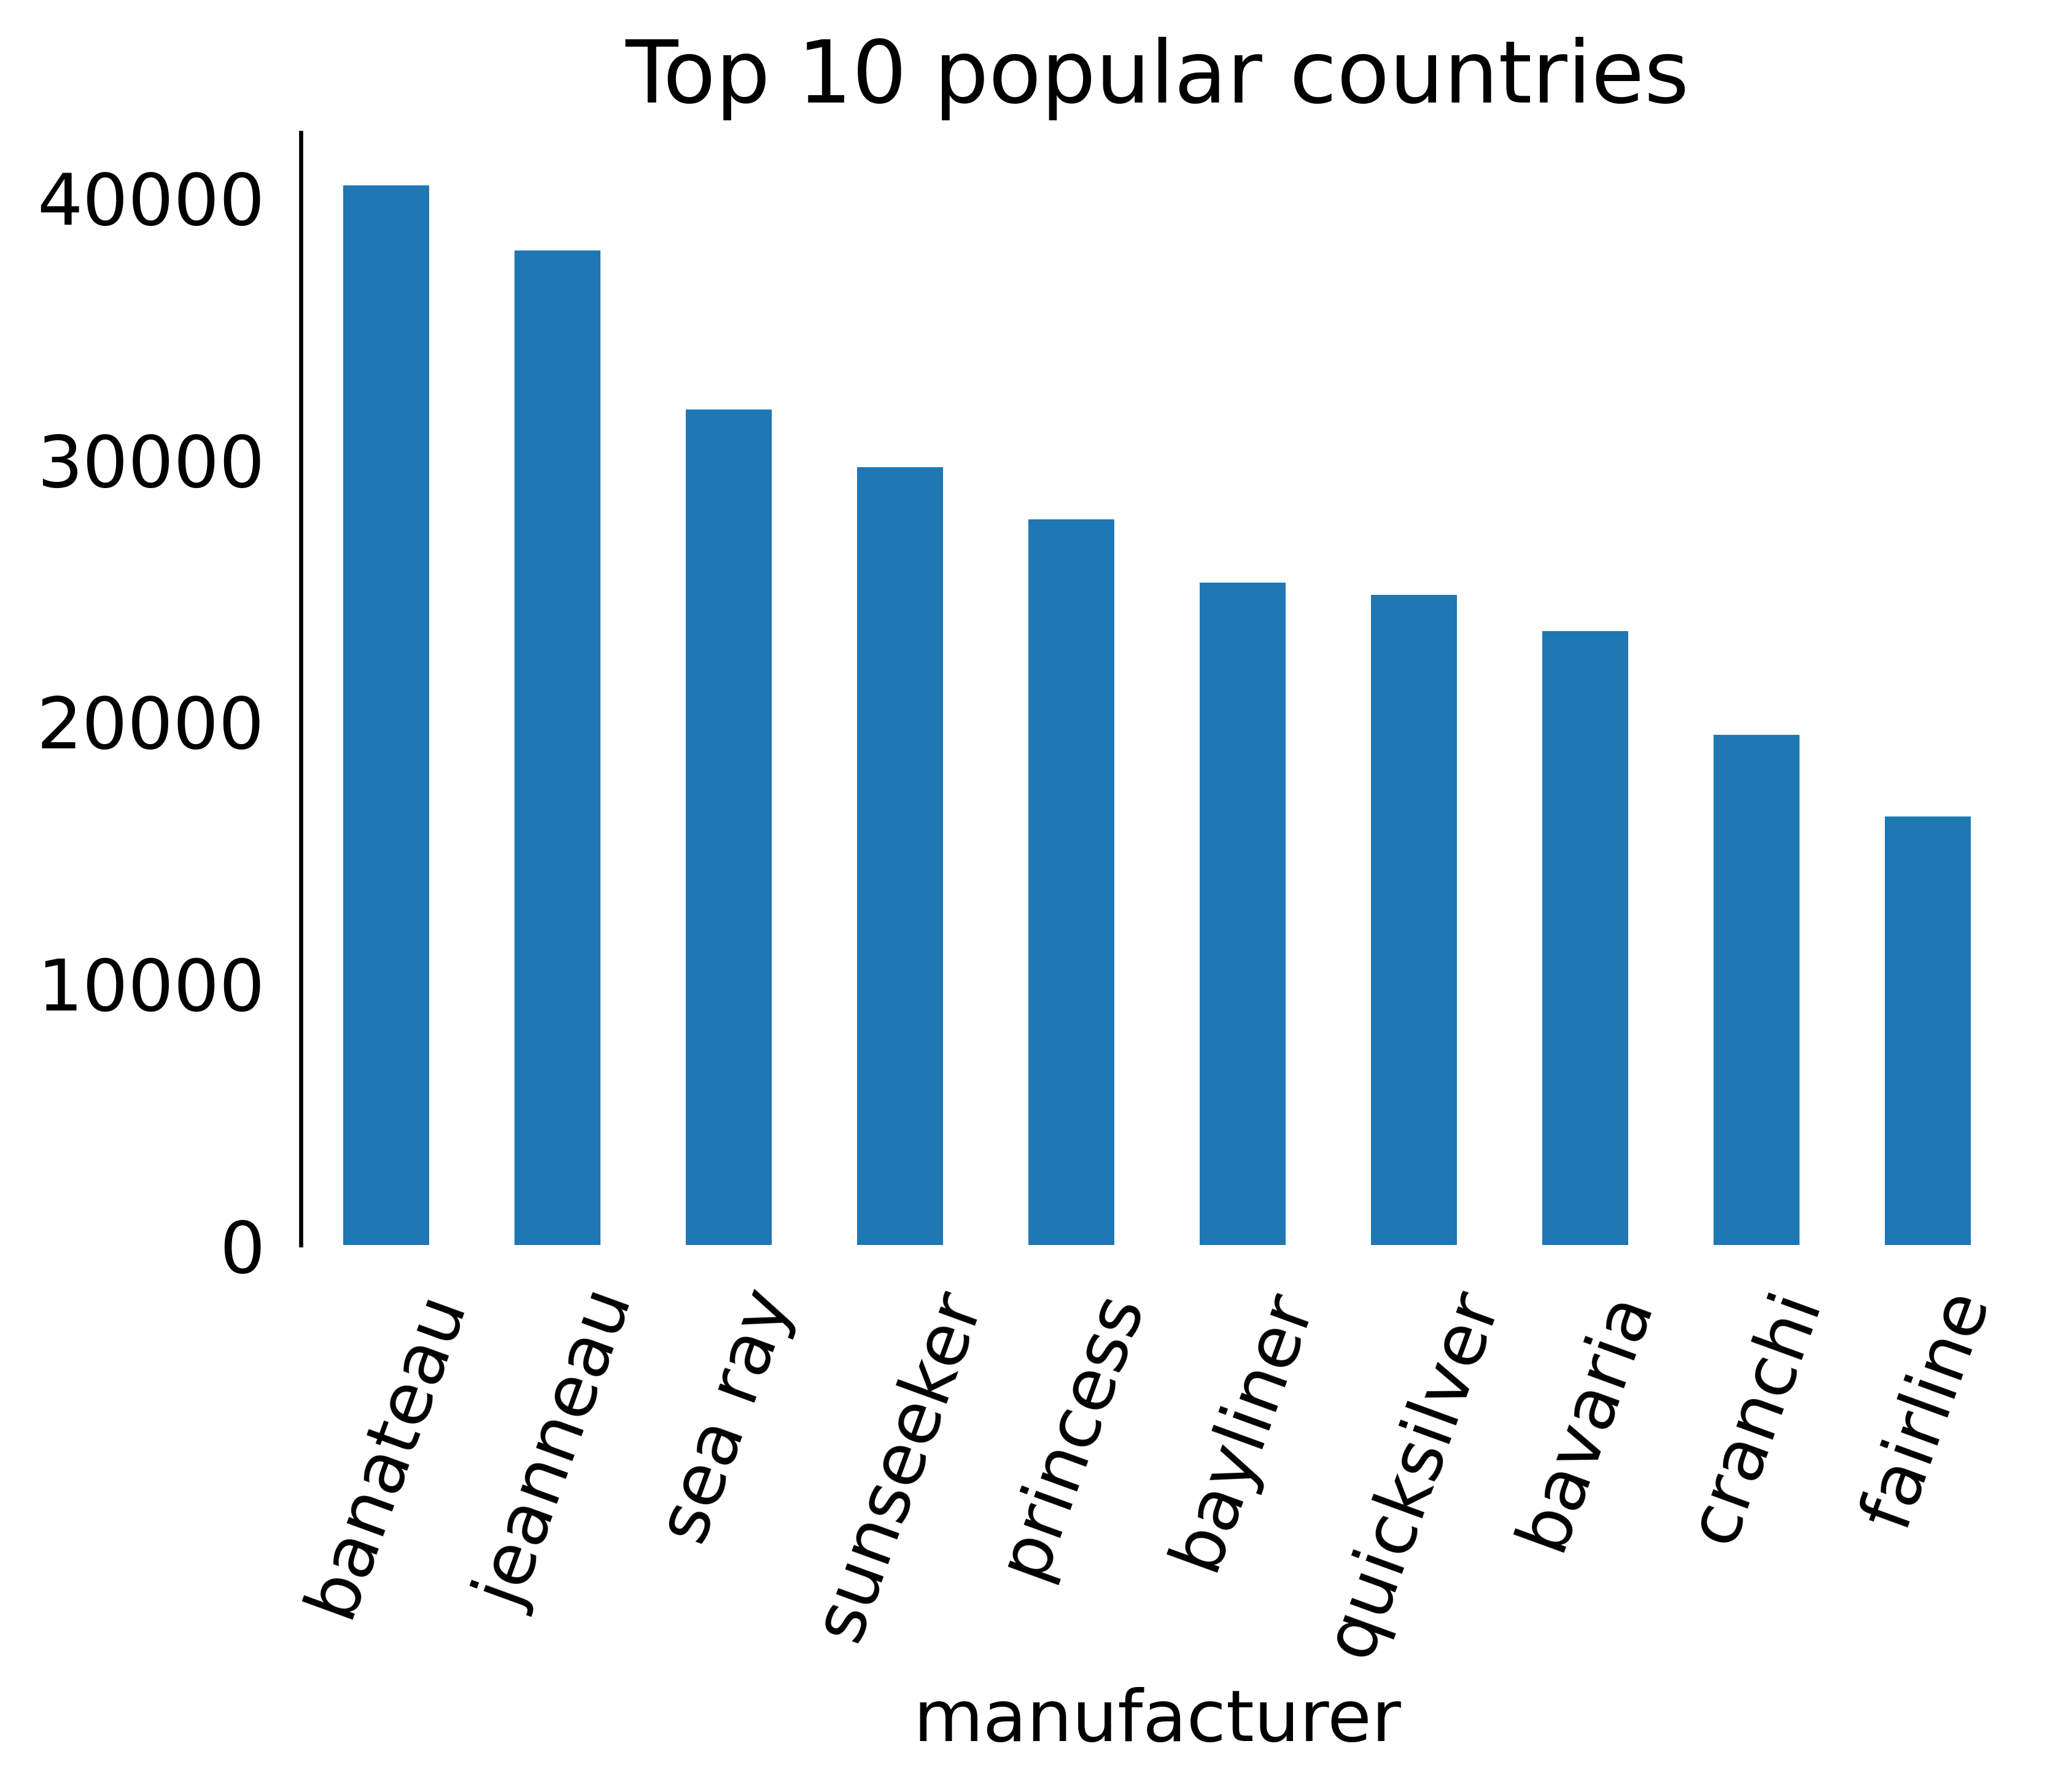

In [141]:
df_eda.groupby('manufacturer')['views_7d'].sum().sort_values(
    ascending=False).head(10).plot(kind='bar', title='Top 10 popular countries')
plt.xticks(rotation=70)
plt.show()


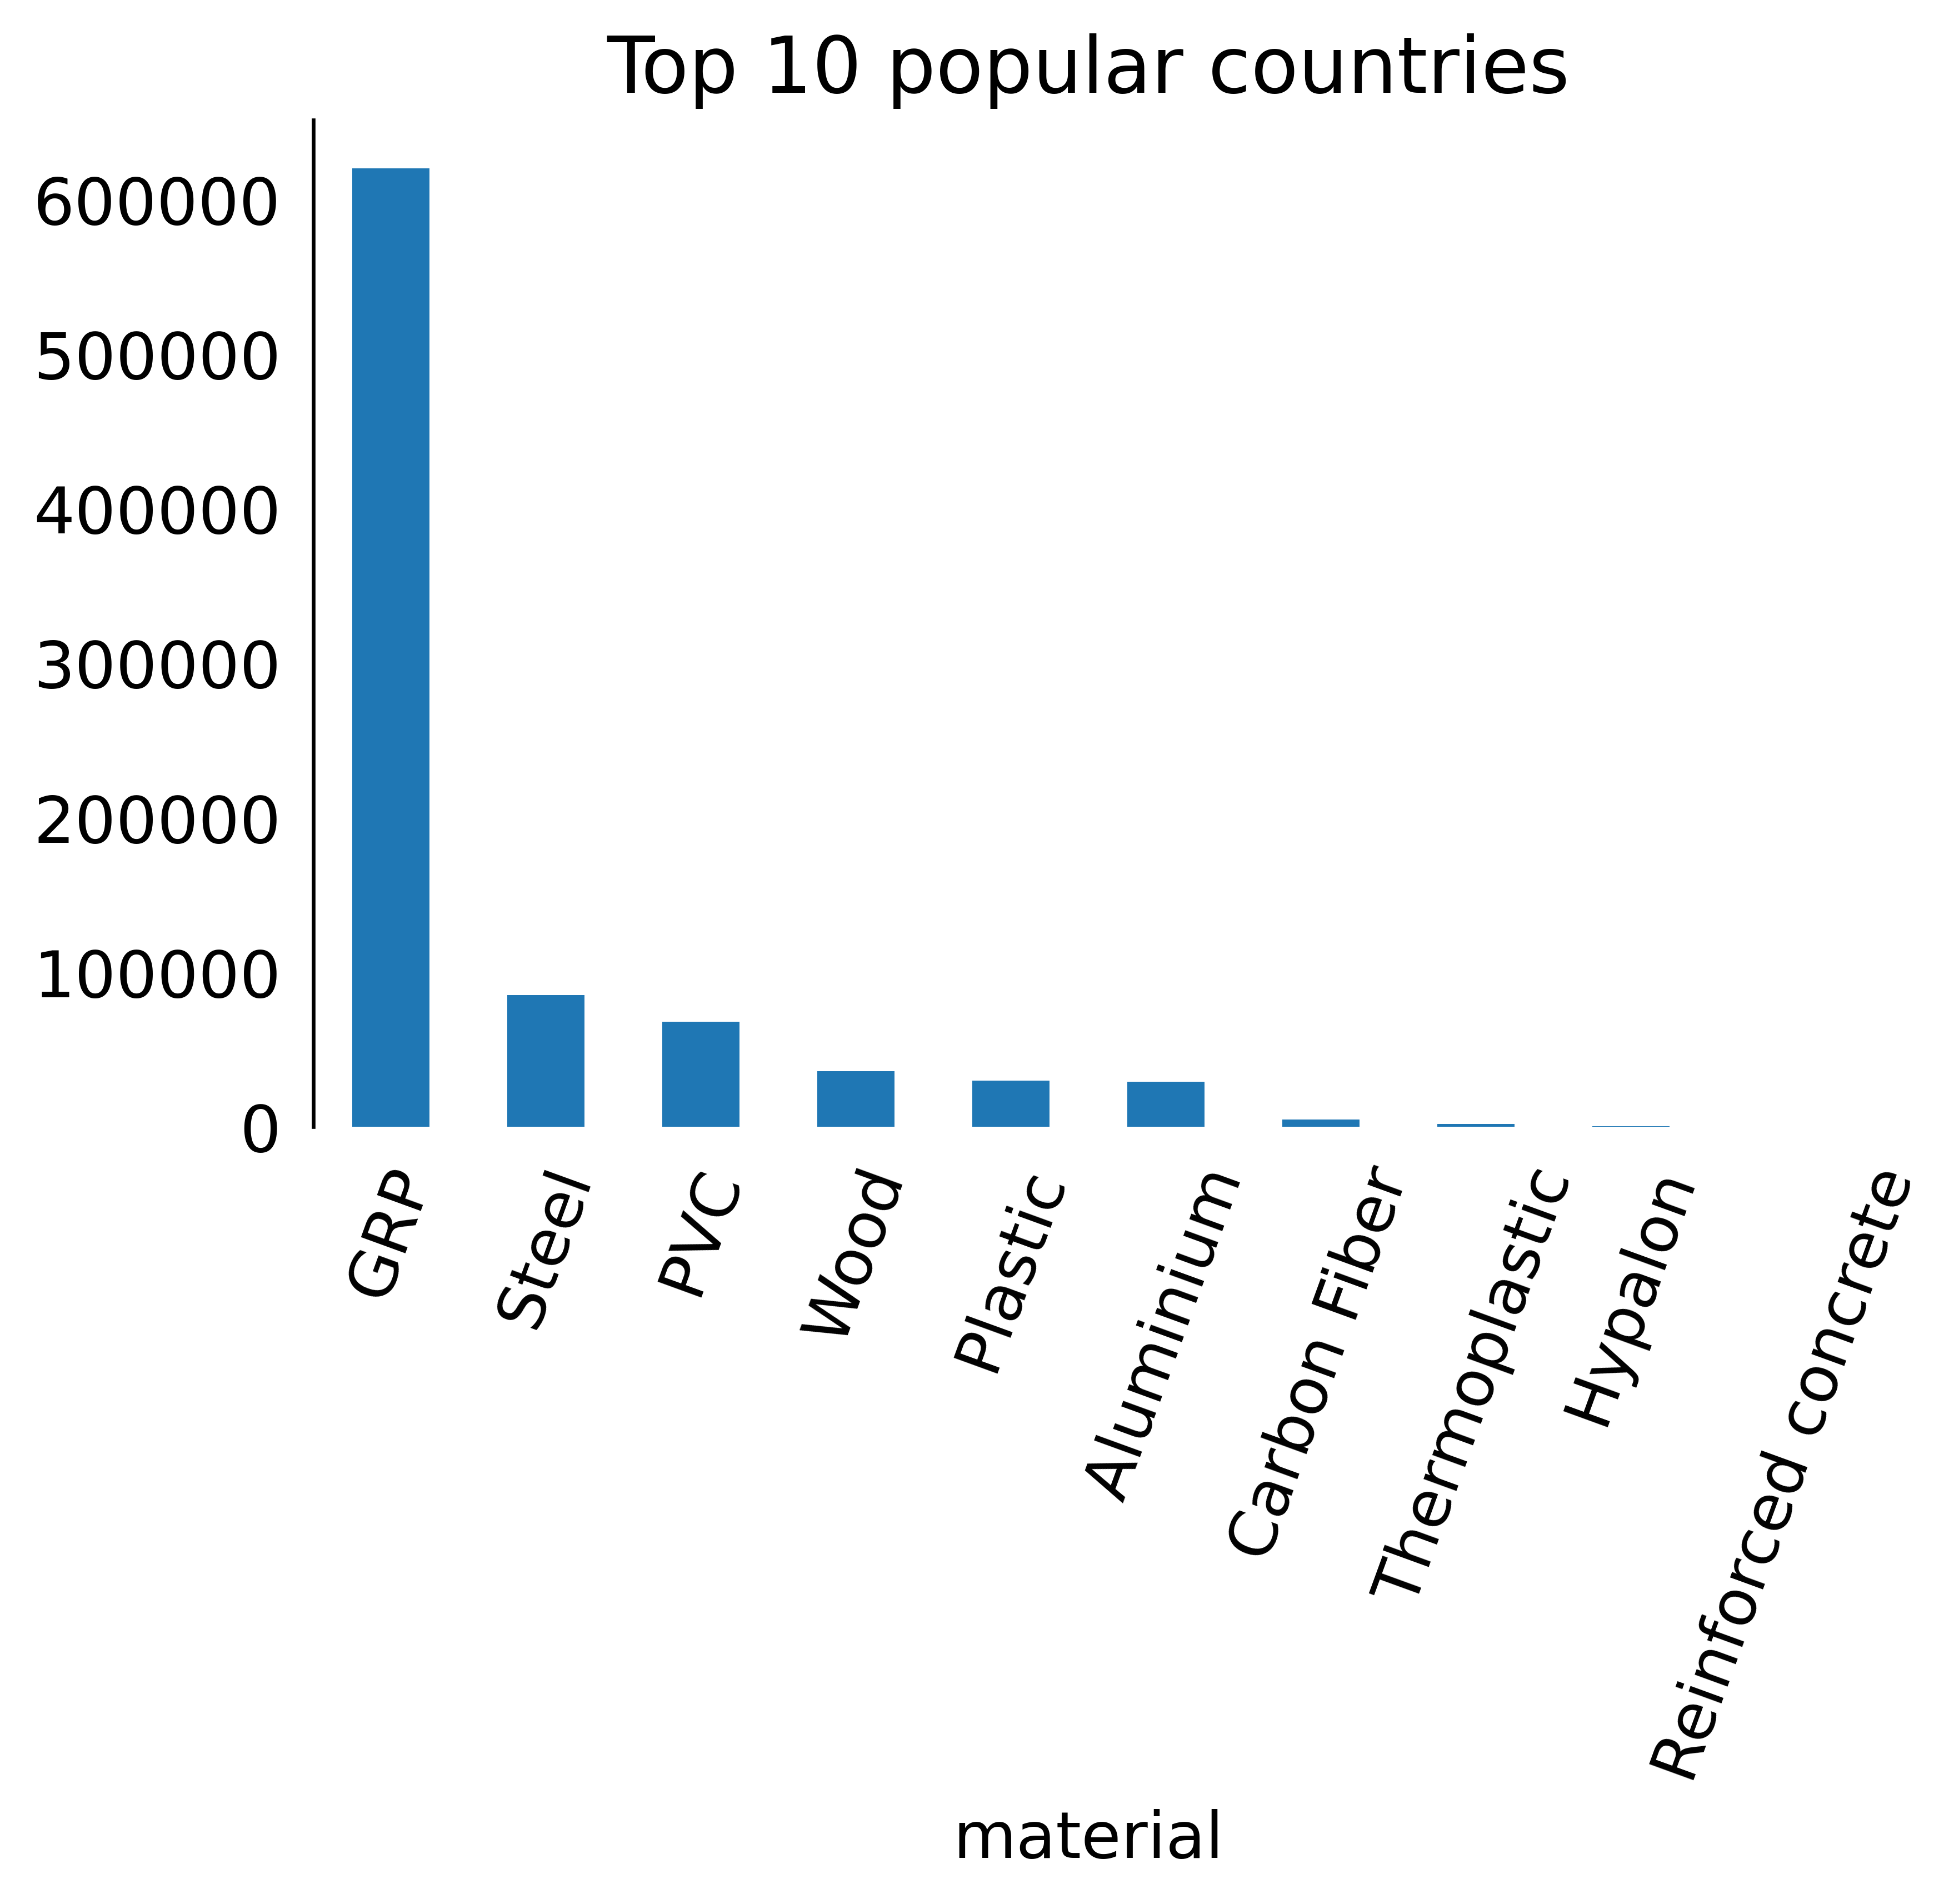

In [142]:
df_eda.groupby('material')['views_7d'].sum().sort_values(ascending=False).head(
    10).plot(kind='bar', title='Top 10 popular countries')
plt.xticks(rotation=70)
plt.show()


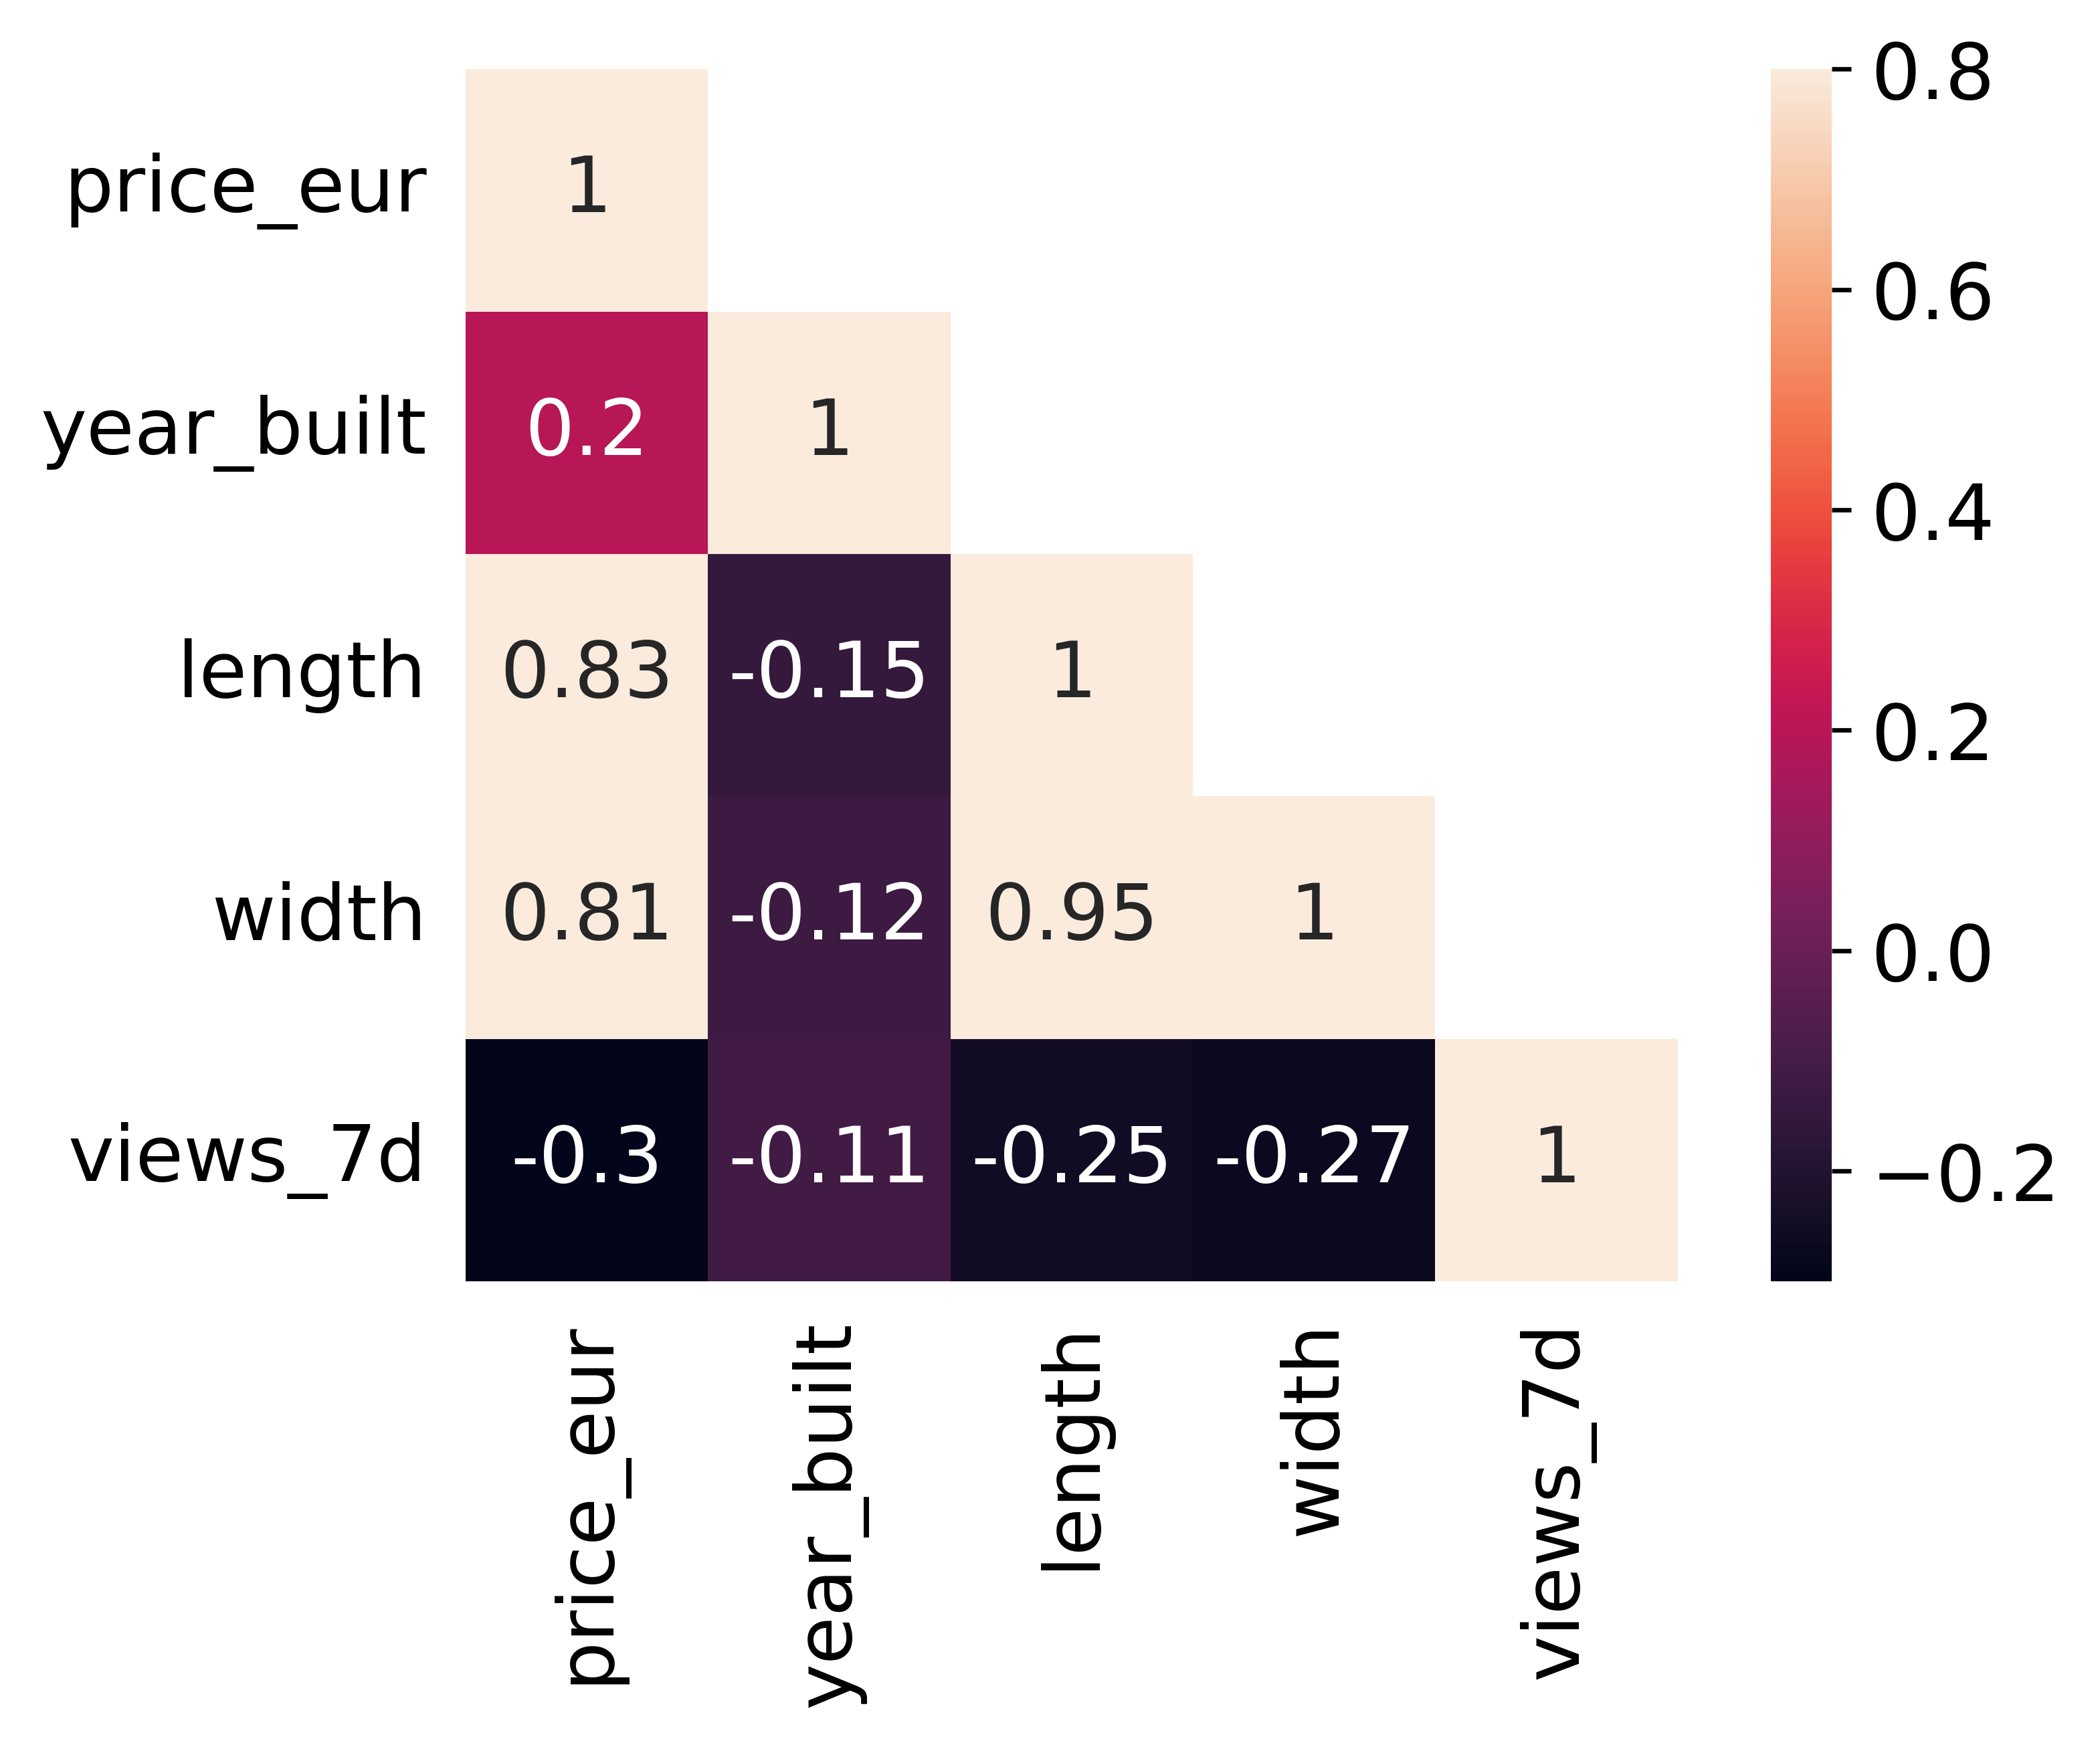

In [155]:
corr = df_eda.sort_index().corr(method='spearman')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig = sns.heatmap(corr, mask=mask,
                  vmax=.8, square=True, annot=True)


Mais um indicativo de que um maior numero de visitas está associado a barcos mais baratos.


## Model Development


### Feature Engineering


In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_predict

# Setting up evaluation function


def eval(y_true, preds):
    '''Takes in true values and predictions, prints out MAE, MSE, RMSE, MAPE and R2'''
    print("Mean Absolute Error:", mean_absolute_error(y_true, preds).round(2))
    print("Mean Squared Error:", mean_squared_error(y_true, preds).round(2))
    print("Root Mean Squared Error:", np.sqrt(
        mean_squared_error(y_true, preds)).round(2))
    print(
        f"Mean Absolute Percentage Error: {(mean_absolute_percentage_error(y_true, preds)*100).round(0)}%")
    print(
        f"Explained Variance score: {(r2_score(y_true, preds)*100).round(0)}%")


def get_cv_scores(model, X, y):
    '''Returns cross-validation scores.'''
    pred_ = cross_val_predict(model, X, y, cv=10)
    return eval(y, pred_)


def get_test_scores(model, X, y, X_test, y_test):
    '''Returns test scores.'''
    model.fit(X, y)
    pred_ = model.predict(X_test)
    return eval(y_test, pred_)


### Detecting cardinality


In [156]:
from feature_engine.encoding import OneHotEncoder, RareLabelEncoder

# Take columns names with cardinality above 30
sub_df = X.select_dtypes(include='object').nunique()
mask_cardinality = sub_df > 30
high_card_cols = sub_df[mask_cardinality].index.tolist()
low_card_cols = sub_df[~mask_cardinality].index.tolist()


In [170]:
# Encoding rare categories
rare_enc = RareLabelEncoder(tol=0.001, n_categories=3, max_n_categories=None,
                            replace_with='other', variables=high_card_cols+low_card_cols, ignore_format=False)
rare_enc.fit(X, y)

X_train_enc = rare_enc.transform(X)
X_test_enc = rare_enc.transform(X_test)

# One-hot encoding low cardinality columns
ohe_enc = OneHotEncoder(top_categories=None, drop_last=False,
                        drop_last_binary=False, variables=low_card_cols, ignore_format=False)

ohe_enc.fit(X_train_enc, y)

X_train_enc = ohe_enc.transform(X_train_enc)
X_test_enc = ohe_enc.transform(X_test_enc)

X_train_enc.head()


price_eur            boat_type manufacturer  year_built  length  width  \
152    12000.00           Sport Boat        gobbi        1988    6.16   2.49   
8500   37900.00  Center console boat     jeanneau        2019    6.94   2.48   
968    48000.00           Pilothouse     jeanneau        2014    7.74   2.81   
1002   53490.50            Deck Boat     jeanneau           0    9.53   3.07   
7937   49529.00           Pilothouse     banateau        2020    6.50   2.40   

             country  material_Plastic  material_GRP  material_PVC  ...  \
152            Italy                 1             0             0  ...   
8500         Germany                 0             1             0  ...   
968           France                 0             0             1  ...   
1002  United Kingdom                 0             0             0  ...   
7937          France                 0             0             1  ...   

      fuel_None  fuel_Diesel  fuel_Electric  fuel_other  condition_used  \
152           0            0              0           0               1   
8500          0            0              0           0               1   
968           0            0              0           0               1   
1002          1            0              0           0               1   
7937          0            0              0           0               0   

      condition_new  currency_EUR  currency_GBP  currency_DKK  currency_CHF  
152               0             1             0             0             0  
8500              0             1             0             0             0  
968               0             1             0             0             0  
1002              0             0             1             0             0  
7937              1             1             0             0             0  

[5 rows x 28 columns]

In [171]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.pipeline import make_pipeline

target_enc = TargetEncoder(verbose=0, cols=high_card_cols, drop_invariant=False, return_df=True,
                           handle_missing='value', handle_unknown='value', min_samples_leaf=1, smoothing=1.0)
target_enc.fit(X_train_enc, y)
X_train_t_enc = target_enc.transform(X_train_enc)
X_test_t_enc = target_enc.transform(X_test_enc)

X_train_t_enc.head()


price_eur  boat_type  manufacturer  year_built  length  width  country  \
152    12000.00     179.00        170.00        1988    6.16   2.49   117.16   
8500   37900.00     100.35         96.57        2019    6.94   2.48   157.96   
968    48000.00     115.54         96.57        2014    7.74   2.81    98.27   
1002   53490.50     102.64         96.57           0    9.53   3.07    87.48   
7937   49529.00     115.54         88.28        2020    6.50   2.40    98.27   

      material_Plastic  material_GRP  material_PVC  ...  fuel_None  \
152                  1             0             0  ...          0   
8500                 0             1             0  ...          0   
968                  0             0             1  ...          0   
1002                 0             0             0  ...          1   
7937                 0             0             1  ...          0   

      fuel_Diesel  fuel_Electric  fuel_other  condition_used  condition_new  \
152             0              0           0               1              0   
8500            0              0           0               1              0   
968             0              0           0               1              0   
1002            0              0           0               1              0   
7937            0              0           0               0              1   

      currency_EUR  currency_GBP  currency_DKK  currency_CHF  
152              1             0             0             0  
8500             1             0             0             0  
968              1             0             0             0  
1002             0             1             0             0  
7937             1             0             0             0  

[5 rows x 28 columns]

In [181]:
import lightgbm as lgb
gbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=SEEDS)

get_cv_scores(gbm_model, X_train_t_enc, y)


Mean Absolute Error: 60.89
Mean Squared Error: 13907.8
Root Mean Squared Error: 117.93
Mean Absolute Percentage Error: 49.0%
Explained Variance score: 41.0%


In [182]:
from sklearn.compose import TransformedTargetRegressor
import scipy as sp
from lightgbm import LGBMRegressor

lgbm_pipe = make_pipeline(TransformedTargetRegressor(
    regressor=LGBMRegressor(n_estimators=100, random_state=SEEDS),
    func=np.log10, inverse_func=sp.special.exp10
)

)

print('--- CV Results ---')
get_cv_scores(lgbm_pipe, X_train_t_enc, y)


Mean Absolute Error: 56.71
Mean Squared Error: 13885.77
Root Mean Squared Error: 117.84
Mean Absolute Percentage Error: 41.0%
Explained Variance score: 41.0%


## Model Evaluation


In [184]:
lgbm_pipe.fit(X_train_t_enc, y)

y_test_pred = lgbm_pipe.predict(X_test_t_enc)

print('--- Test Results ---')
eval(y_test, y_test_pred)


--- Test Results ---
Mean Absolute Error: 56.66
Mean Squared Error: 12559.92
Root Mean Squared Error: 112.07
Mean Absolute Percentage Error: 41.0%
Explained Variance score: 43.0%


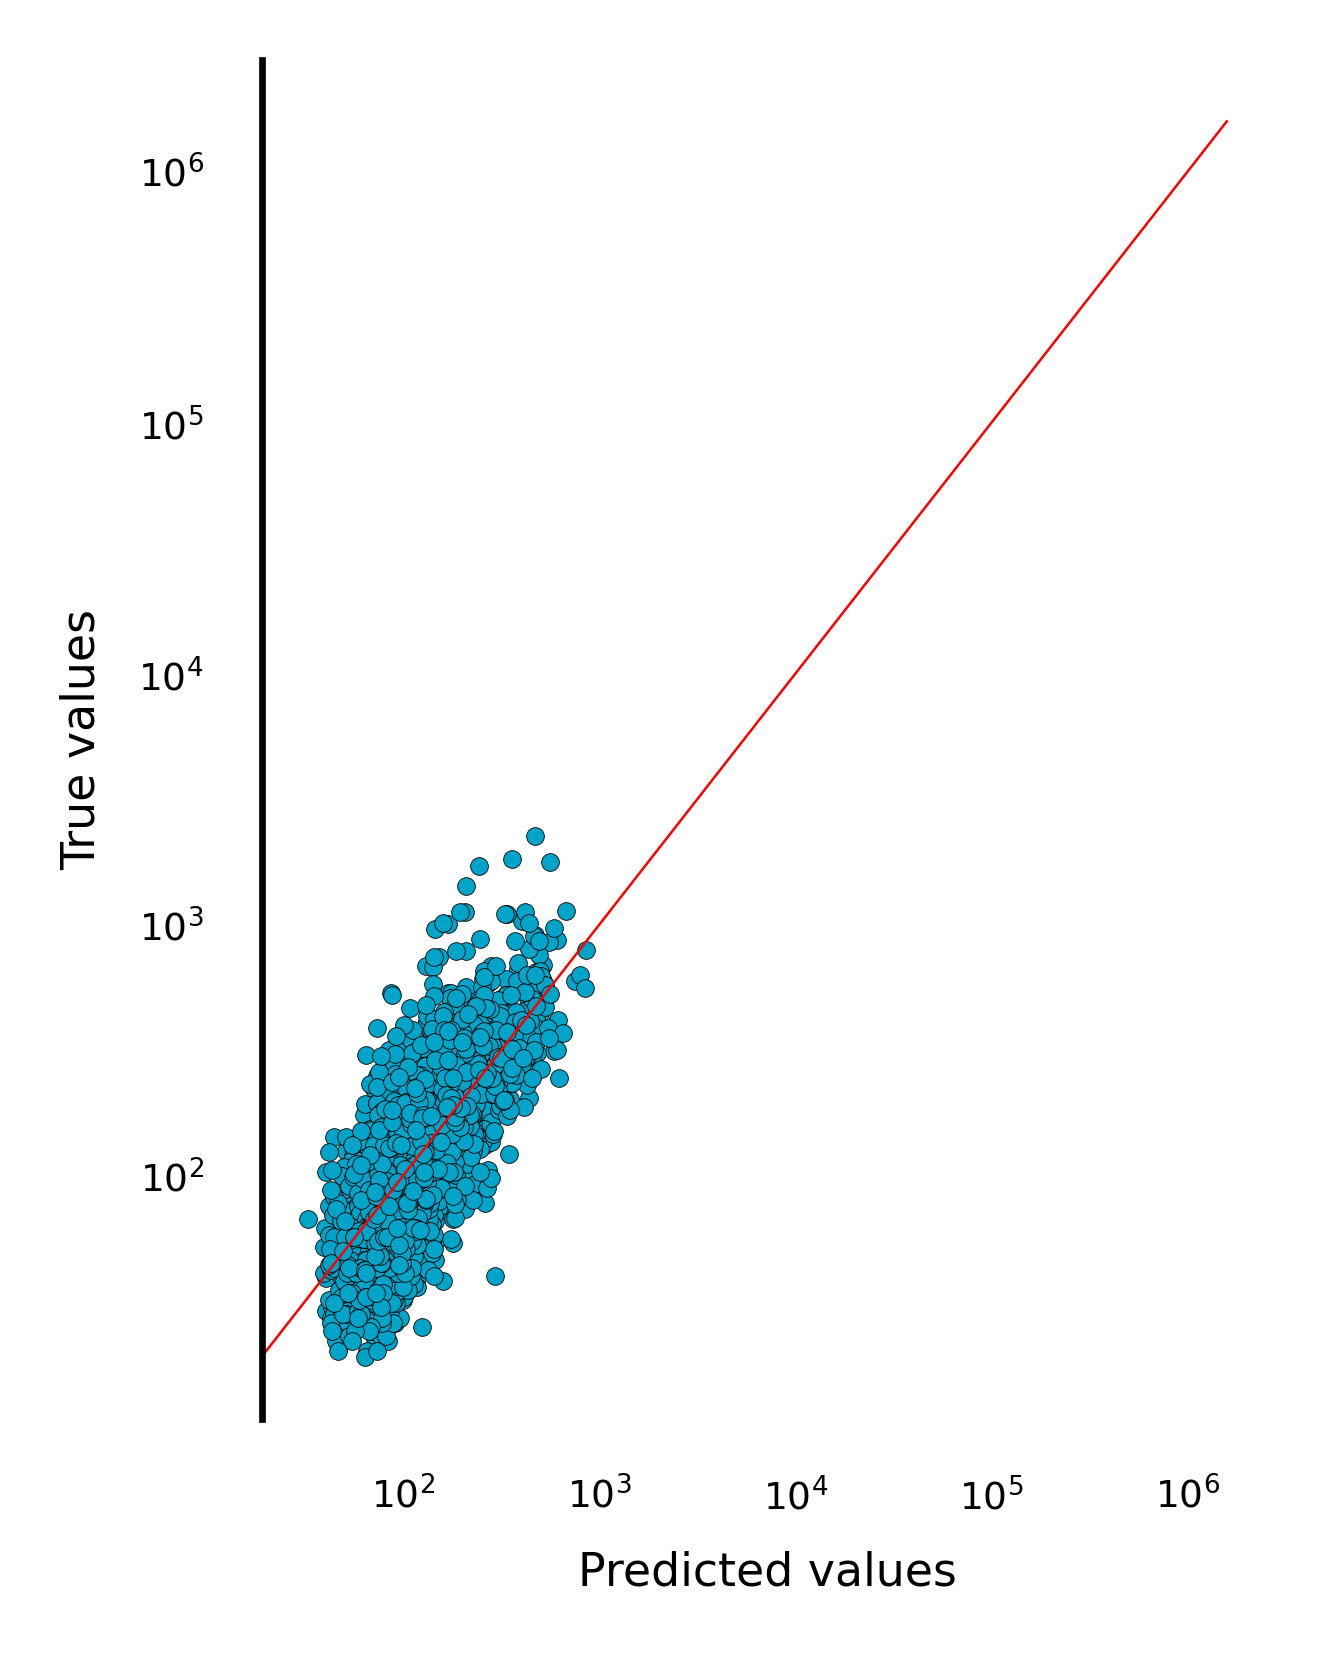

In [188]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='white')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("white")
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#ax0.text(min(y_test_pred)-900, 10**6.8, 'Distribution of values', color = 'black', fontsize = 7, ha = 'left', va = 'bottom', weight = 'bold')
#ax0.text(min(y_test_pred)-900, 10**6.8, 'predicted and true, on the test set', color = 'black', fontsize = 5.5, ha = 'left', va = 'top')
ax0_sns = sns.scatterplot(ax=ax0, x=y_test_pred, y=y_test,
                          edgecolor="black", linewidth=0.1, color="#00a4c8", s=4.5)
plt.plot([0, 10**6.2], [0, 10**6.2], linewidth=0.3, color="red")
ax0_sns.set_yscale('log')
ax0_sns.set_xscale('log')
ax0_sns.set_ylabel("True values", fontsize=5.5)
ax0_sns.set_xlabel("Predicted values", fontsize=5.5)
ax0_sns.tick_params(labelsize=4.5)
plt.show()


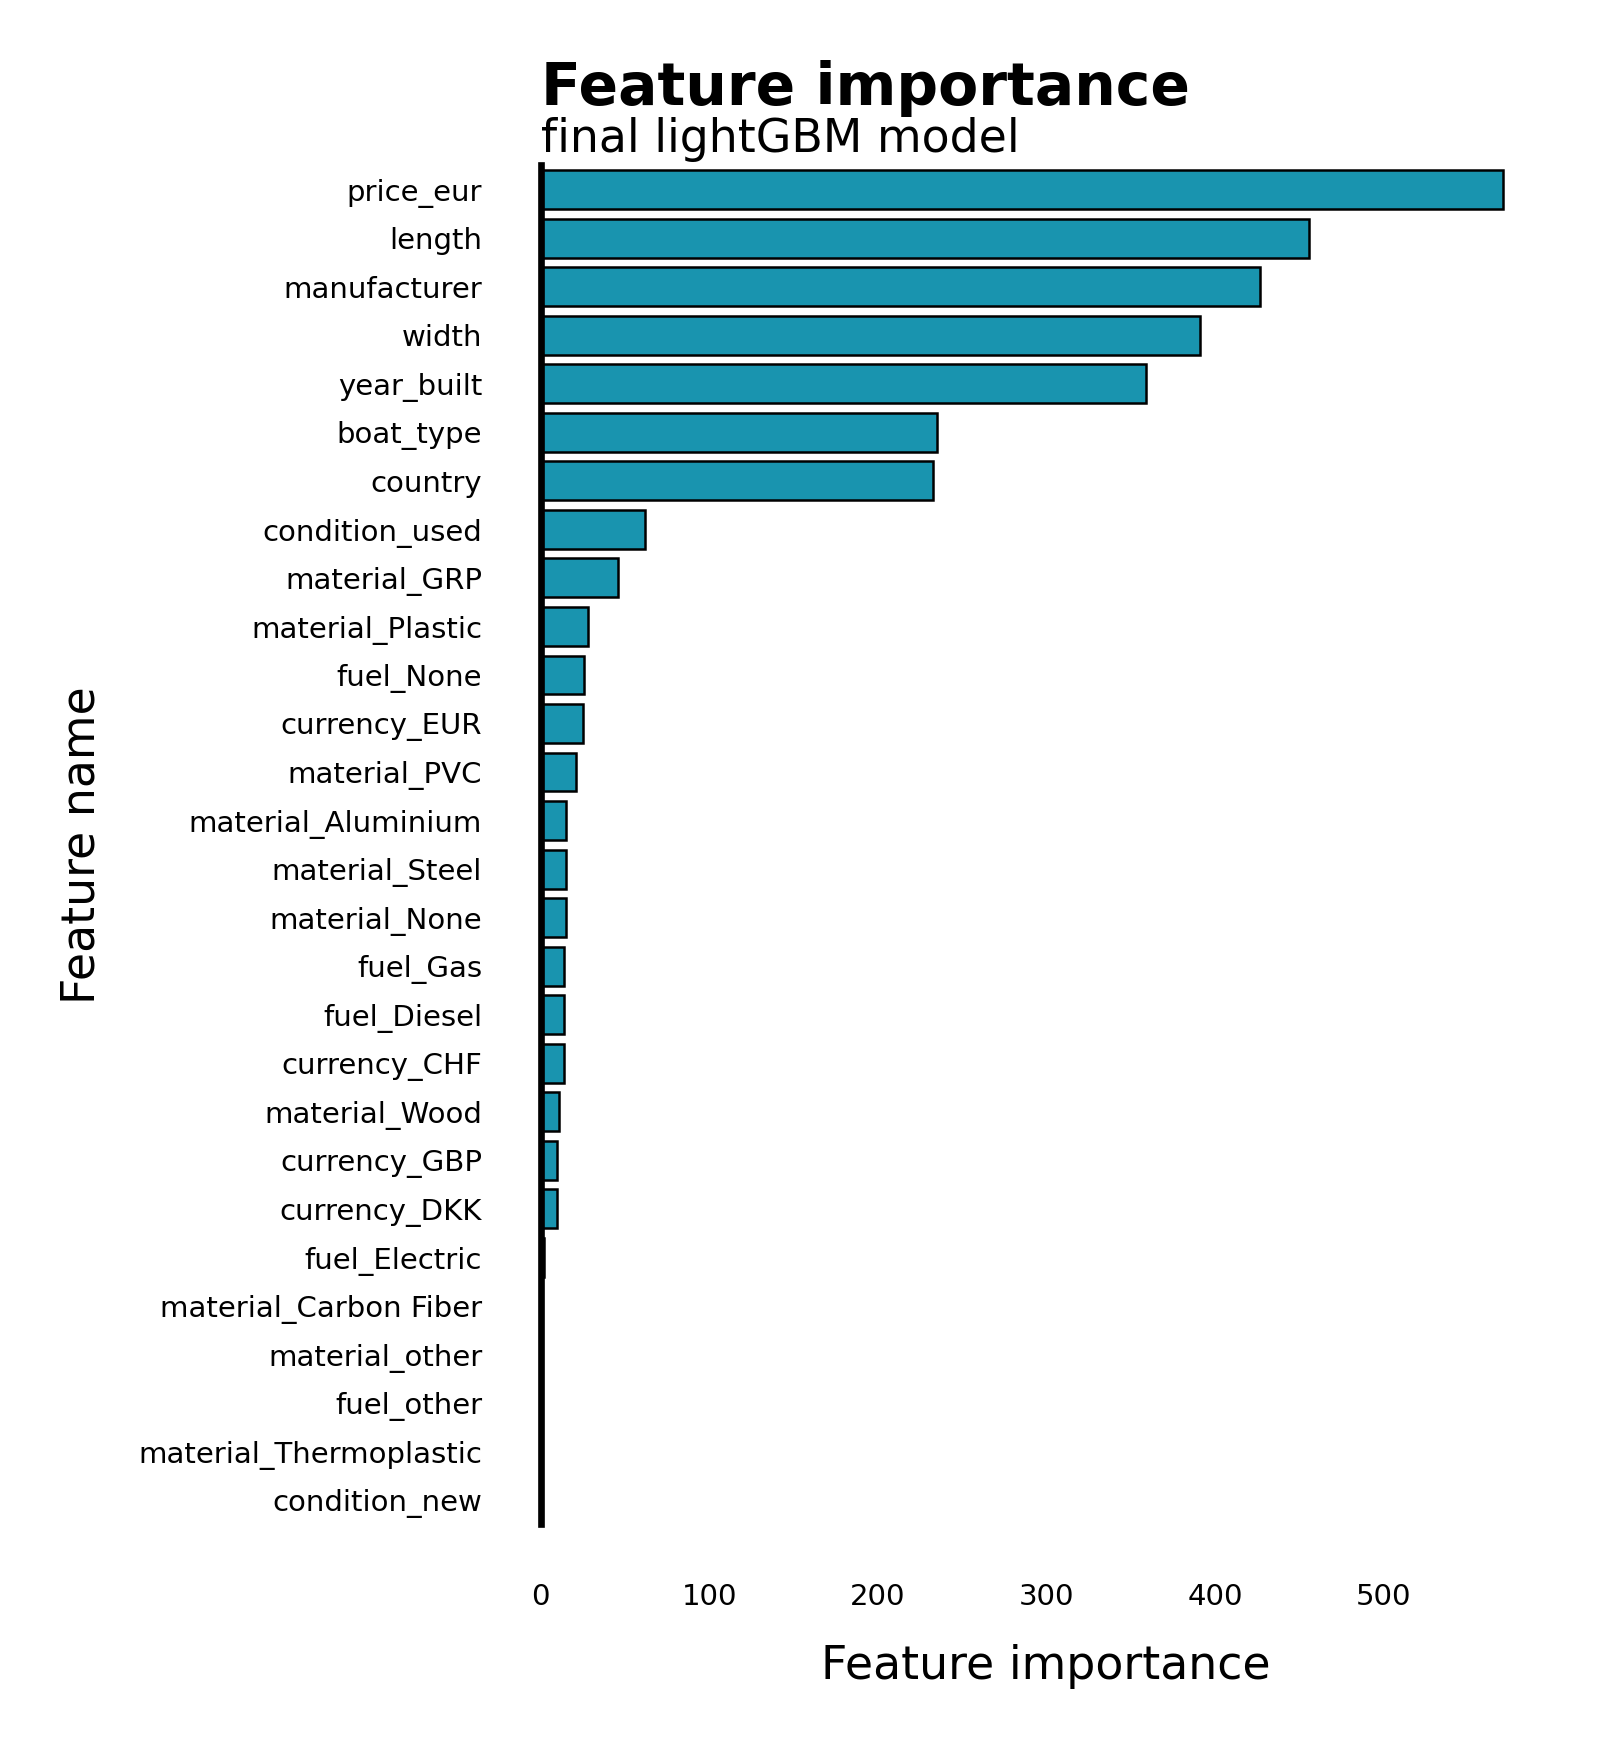

In [186]:
importance = pd.DataFrame({'Value': lgbm_pipe.named_steps['transformedtargetregressor'].regressor_.feature_importances_,
                          'Feature': X_train_t_enc.columns.tolist()}).sort_values(by="Value", ascending=False)

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='white')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("white")
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(0, -1.5, 'Feature importance ', color='black',
         fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -1.5, 'final lightGBM model', color='black',
         fontsize=5.5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=importance['Feature'], x=importance['Value'],
                      edgecolor="black", linewidth=0.3, color="#00a4c8", orient="h")
ax0_sns.set_ylabel("Feature name", fontsize=5.5)
ax0_sns.set_xlabel("Feature importance", fontsize=5.5)
ax0_sns.tick_params(labelsize=3.5)
plt.show()


A variável mais relevante para prever o número de views é o preço, o que coincide com a análise exploratória.


## Results


- Mean Absolute Error: 56.66 views
- Mean Squared Error: 12559.92 views
- Root Mean Squared Error: 112.07 views
- Mean Absolute Percentage Error: 41.0%
- Explained Variance score: 43.0%


Foi alcançado com certa folga o objetivo com 41% de erro.
MAE de 56 views


- on average it was wrong by over 110 views
- prediction accuracy of 59%


## Summary


Finally, we summarize the entire analysis. Our goal was to create a prediction model that would predict the the number of views from the last 7 days. The task started with an exploratory analysis and the creation of new variables, then, going through various preliminary analyzes, we reached the stage of creating the Lightgbm model.

By minimizing the mean absolute percentage error, the model, looking at the results on the training and test set, unfortunately, turned out to be not the best, even after optimizing the hyperparameters (on average it was wrong by over 56 view). The fact that the model performed on average does not mean that it assigned values randomly, but it had problems with detecting some dependencies and its application in practice seems doubtful.

A valid solution for the future is to include other variables besides the ones in the model (e.g.). The location will certainly be an important factor in such a predictive model.
